# Extracting info out boroughs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
import glob

import ipywidgets as widgets
import folium 
from IPython.display import display

In [2]:
# Read UK data

def process_MOPAC_csv_files(file_path):
    # Read the CSV file
   
    df = pd.read_csv(file_path, index_col=False)

    return df

In [3]:
# Street crimes all of London

b = True
for file_path in glob.glob('\\temp\\MOPAC\\*london*street.csv' ): 
    #if point_year in range(start_year, end_year+1):
    #files_to_process = f"\\Users\\Casey\\Dash\\JupyNote\\data\\Stats19\\collision_{point_year}.csv"
    #if file_path == files_to_process: 
    if file_path != '':
        print(file_path) 
        _df_street = process_MOPAC_csv_files(file_path)
        if b == True:
            df_street = _df_street.copy()
            b = False    
        else:
            df_street= pd.concat([df_street, _df_street], ignore_index=True)
        
df_street.to_csv('\\Temp\\MOPAC\\output\\rh_street.csv')

\temp\MOPAC\2022-01-city-of-london-street.csv
\temp\MOPAC\2022-02-city-of-london-street.csv
\temp\MOPAC\2022-03-city-of-london-street.csv
\temp\MOPAC\2022-04-city-of-london-street.csv
\temp\MOPAC\2022-05-city-of-london-street.csv
\temp\MOPAC\2022-06-city-of-london-street.csv
\temp\MOPAC\2022-07-city-of-london-street.csv
\temp\MOPAC\2022-10-city-of-london-street.csv
\temp\MOPAC\2022-11-city-of-london-street.csv
\temp\MOPAC\2022-12-city-of-london-street.csv
\temp\MOPAC\2023-01-city-of-london-street.csv
\temp\MOPAC\2023-02-city-of-london-street.csv
\temp\MOPAC\2023-03-city-of-london-street.csv
\temp\MOPAC\2023-04-city-of-london-street.csv
\temp\MOPAC\2023-05-city-of-london-street.csv
\temp\MOPAC\2023-06-city-of-london-street.csv
\temp\MOPAC\2023-07-city-of-london-street.csv
\temp\MOPAC\2023-08-city-of-london-street.csv
\temp\MOPAC\2023-09-city-of-london-street.csv
\temp\MOPAC\2023-10-city-of-london-street.csv
\temp\MOPAC\2023-11-city-of-london-street.csv
\temp\MOPAC\2023-12-city-of-london

In [4]:
# Street crimes all of Stop-and-search London

b = True
for file_path in glob.glob('\\temp\\MOPAC\\*london*search.csv' ): 
  
    if file_path != '':
        print(file_path) 
        _df_search = process_MOPAC_csv_files(file_path)
        if b == True:
            df_search = _df_search.copy()
            b = False    
        else:
            df_search= pd.concat([df_search, _df_search], ignore_index=True)
        
df_search.to_csv('\\Temp\\MOPAC\\output\\rh_search.csv')

\temp\MOPAC\2020-04-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-05-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-06-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-07-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-08-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-09-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-10-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-11-city-of-london-stop-and-search.csv
\temp\MOPAC\2020-12-city-of-london-stop-and-search.csv
\temp\MOPAC\2021-01-city-of-london-stop-and-search.csv
\temp\MOPAC\2021-02-city-of-london-stop-and-search.csv
\temp\MOPAC\2021-03-city-of-london-stop-and-search.csv
\temp\MOPAC\2021-04-city-of-london-stop-and-search.csv
\temp\MOPAC\2022-01-city-of-london-stop-and-search.csv
\temp\MOPAC\2022-02-city-of-london-stop-and-search.csv
\temp\MOPAC\2022-03-city-of-london-stop-and-search.csv
\temp\MOPAC\2022-04-city-of-london-stop-and-search.csv
\temp\MOPAC\2022-05-city-of-london-stop-and-search.csv
\temp\MOPA

In [5]:
boroughs = {
    'Barking and Dagenham': {'lat_min': 51.52, 'lat_max': 51.58, 'lon_min': 0.10, 'lon_max': 0.20},
    'Barnet': {'lat_min': 51.55, 'lat_max': 51.65, 'lon_min': -0.27, 'lon_max': -0.13},
    'Bexley': {'lat_min': 51.43, 'lat_max': 51.50, 'lon_min': 0.10, 'lon_max': 0.20},
    'Brent': {'lat_min': 51.53, 'lat_max': 51.59, 'lon_min': -0.30, 'lon_max': -0.21},
    'Bromley': {'lat_min': 51.35, 'lat_max': 51.43, 'lon_min': 0.00, 'lon_max': 0.10},
    'Camden': {'lat_min': 51.52, 'lat_max': 51.56, 'lon_min': -0.18, 'lon_max': -0.13},
    'Croydon': {'lat_min': 51.33, 'lat_max': 51.39, 'lon_min': -0.12, 'lon_max': -0.04},
    'Ealing': {'lat_min': 51.49, 'lat_max': 51.55, 'lon_min': -0.32, 'lon_max': -0.24},
    'Enfield': {'lat_min': 51.62, 'lat_max': 51.67, 'lon_min': -0.13, 'lon_max': -0.03},
    'Greenwich': {'lat_min': 51.44, 'lat_max': 51.51, 'lon_min': 0.00, 'lon_max': 0.05},
    'Hackney': {'lat_min': 51.53, 'lat_max': 51.57, 'lon_min': -0.08, 'lon_max': -0.03},
    'Hammersmith and Fulham': {'lat_min': 51.47, 'lat_max': 51.51, 'lon_min': -0.24, 'lon_max': -0.18},
    'Haringey': {'lat_min': 51.57, 'lat_max': 51.60, 'lon_min': -0.13, 'lon_max': -0.06},
    'Harrow': {'lat_min': 51.55, 'lat_max': 51.60, 'lon_min': -0.37, 'lon_max': -0.30},
    'Havering': {'lat_min': 51.54, 'lat_max': 51.60, 'lon_min': 0.15, 'lon_max': 0.25},
    'Hillingdon': {'lat_min': 51.50, 'lat_max': 51.56, 'lon_min': -0.49, 'lon_max': -0.38},
    'Hounslow': {'lat_min': 51.45, 'lat_max': 51.50, 'lon_min': -0.37, 'lon_max': -0.25},
    'Islington': {'lat_min': 51.52, 'lat_max': 51.56, 'lon_min': -0.13, 'lon_max': -0.09},
    'Kensington and Chelsea': {'lat_min': 51.48, 'lat_max': 51.52, 'lon_min': -0.22, 'lon_max': -0.16},
    'Kingston upon Thames': {'lat_min': 51.38, 'lat_max': 51.42, 'lon_min': -0.32, 'lon_max': -0.25},
    'Lambeth': {'lat_min': 51.45, 'lat_max': 51.50, 'lon_min': -0.13, 'lon_max': -0.10},
    'Lewisham': {'lat_min': 51.43, 'lat_max': 51.47, 'lon_min': -0.04, 'lon_max': 0.03},
    'Merton': {'lat_min': 51.39, 'lat_max': 51.43, 'lon_min': -0.23, 'lon_max': -0.16},
    'Newham': {'lat_min': 51.50, 'lat_max': 51.55, 'lon_min': 0.00, 'lon_max': 0.06},
    'Redbridge': {'lat_min': 51.55, 'lat_max': 51.60, 'lon_min': 0.05, 'lon_max': 0.10},
    'Richmond upon Thames': {'lat_min': 51.43, 'lat_max': 51.49, 'lon_min': -0.33, 'lon_max': -0.26},
    'Southwark': {'lat_min': 51.47, 'lat_max': 51.51, 'lon_min': -0.09, 'lon_max': -0.03},
    'Sutton': {'lat_min': 51.34, 'lat_max': 51.37, 'lon_min': -0.21, 'lon_max': -0.15},
    'Tower Hamlets': {'lat_min': 51.50, 'lat_max': 51.53, 'lon_min': -0.06, 'lon_max': 0.00},
    'Waltham Forest': {'lat_min': 51.57, 'lat_max': 51.61, 'lon_min': -0.04, 'lon_max': 0.03},
    'Wandsworth': {'lat_min': 51.43, 'lat_max': 51.47, 'lon_min': -0.21, 'lon_max': -0.15},
    'Westminster': {'lat_min': 51.48, 'lat_max': 51.53, 'lon_min': -0.19, 'lon_max': -0.10}
}

In [45]:
df_search

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,Low Trust
1,Person search,2020-04-01T05:26:18+00:00,NaN,NaN,51.512830,-0.108175,Male,NaN,Other ethnic group - Any other ethnic group,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,True,False,Merton,False
4,Person search,2020-04-02T07:59:17+00:00,NaN,NaN,51.513928,-0.108231,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,Merton,False
12,Person search,2020-04-06T05:59:12+00:00,NaN,NaN,51.520699,-0.097601,Male,over 34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Community resolution,True,False,Merton,False
15,Person search,2020-04-07T08:56:05+00:00,NaN,NaN,51.521853,-0.094468,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Merton,False
18,Person search,2020-04-08T04:01:14+00:00,NaN,NaN,51.521660,-0.095860,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Merton,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Person search,2024-03-29T15:16:35+00:00,NaN,NaN,51.506138,-0.124836,Male,over 34,Asian/Asian British - Indian,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Merton,False
7990,Person search,2024-03-29T15:35:36+00:00,NaN,NaN,51.518106,-0.116951,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Merton,False
7996,Person and Vehicle search,2024-03-30T00:00:28+00:00,NaN,NaN,51.516067,-0.112019,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Merton,False
7997,Person search,2024-03-30T00:29:50+00:00,NaN,NaN,51.514448,-0.100888,Male,over 34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Merton,False


In [47]:
def get_borough(lat, lon, boroughs):
    for borough, bounds in boroughs.items():
        if bounds['lat_min'] <= lat <= bounds['lat_max'] and bounds['lon_min'] <= lon <= bounds['lon_max']:
            return borough
    return 'Unknown'

# Apply the get_borough function to add the Borough column
df=df_search.copy()
df['Borough'] = df.apply(lambda row: get_borough(row['Latitude'], row['Longitude'], boroughs), axis=1)

In [48]:
df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,Low Trust
1,Person search,2020-04-01T05:26:18+00:00,NaN,NaN,51.512830,-0.108175,Male,NaN,Other ethnic group - Any other ethnic group,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,True,False,Westminster,False
4,Person search,2020-04-02T07:59:17+00:00,NaN,NaN,51.513928,-0.108231,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,Westminster,False
12,Person search,2020-04-06T05:59:12+00:00,NaN,NaN,51.520699,-0.097601,Male,over 34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Community resolution,True,False,Islington,False
15,Person search,2020-04-07T08:56:05+00:00,NaN,NaN,51.521853,-0.094468,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,False
18,Person search,2020-04-08T04:01:14+00:00,NaN,NaN,51.521660,-0.095860,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Person search,2024-03-29T15:16:35+00:00,NaN,NaN,51.506138,-0.124836,Male,over 34,Asian/Asian British - Indian,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Westminster,False
7990,Person search,2024-03-29T15:35:36+00:00,NaN,NaN,51.518106,-0.116951,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Westminster,False
7996,Person and Vehicle search,2024-03-30T00:00:28+00:00,NaN,NaN,51.516067,-0.112019,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Westminster,False
7997,Person search,2024-03-30T00:29:50+00:00,NaN,NaN,51.514448,-0.100888,Male,over 34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Westminster,False


In [49]:
df = df[df['Borough'] != 'Unknown']

In [50]:
df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,Low Trust
1,Person search,2020-04-01T05:26:18+00:00,NaN,NaN,51.512830,-0.108175,Male,NaN,Other ethnic group - Any other ethnic group,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,True,False,Westminster,False
4,Person search,2020-04-02T07:59:17+00:00,NaN,NaN,51.513928,-0.108231,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,Westminster,False
12,Person search,2020-04-06T05:59:12+00:00,NaN,NaN,51.520699,-0.097601,Male,over 34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Community resolution,True,False,Islington,False
15,Person search,2020-04-07T08:56:05+00:00,NaN,NaN,51.521853,-0.094468,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,False
18,Person search,2020-04-08T04:01:14+00:00,NaN,NaN,51.521660,-0.095860,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Person search,2024-03-29T15:16:35+00:00,NaN,NaN,51.506138,-0.124836,Male,over 34,Asian/Asian British - Indian,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Westminster,False
7990,Person search,2024-03-29T15:35:36+00:00,NaN,NaN,51.518106,-0.116951,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Westminster,False
7996,Person and Vehicle search,2024-03-30T00:00:28+00:00,NaN,NaN,51.516067,-0.112019,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Westminster,False
7997,Person search,2024-03-30T00:29:50+00:00,NaN,NaN,51.514448,-0.100888,Male,over 34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Westminster,False


In [51]:
# List of low trust boroughs
low_trust_boroughs = ['Hackney', 'Waltham', 'Lambeth','Islington']

# Add a column to indicate low trust
df2=df.copy()
df2['Low Trust'] = df2['Borough'].isin(low_trust_boroughs)

# Display the DataFrame with the new Low Trust column
#print("DataFrame with Low Trust column:")
#print(df_search)
df2

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,Low Trust
1,Person search,2020-04-01T05:26:18+00:00,NaN,NaN,51.512830,-0.108175,Male,NaN,Other ethnic group - Any other ethnic group,Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,True,False,Westminster,False
4,Person search,2020-04-02T07:59:17+00:00,NaN,NaN,51.513928,-0.108231,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False,False,Westminster,False
12,Person search,2020-04-06T05:59:12+00:00,NaN,NaN,51.520699,-0.097601,Male,over 34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Community resolution,True,False,Islington,True
15,Person search,2020-04-07T08:56:05+00:00,NaN,NaN,51.521853,-0.094468,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,True
18,Person search,2020-04-08T04:01:14+00:00,NaN,NaN,51.521660,-0.095860,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Person search,2024-03-29T15:16:35+00:00,NaN,NaN,51.506138,-0.124836,Male,over 34,Asian/Asian British - Indian,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Westminster,False
7990,Person search,2024-03-29T15:35:36+00:00,NaN,NaN,51.518106,-0.116951,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Westminster,False
7996,Person and Vehicle search,2024-03-30T00:00:28+00:00,NaN,NaN,51.516067,-0.112019,Male,25-34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,True,False,Westminster,False
7997,Person search,2024-03-30T00:29:50+00:00,NaN,NaN,51.514448,-0.100888,Male,over 34,Other ethnic group - Not stated,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Westminster,False


In [52]:
# Split the data
low_trust_df = df2[df2['Low Trust'] == True]
other_boroughs_df = df2[df2['Low Trust'] == False]

In [53]:
# Summary statistics for low trust boroughs
low_trust_summary = low_trust_df.describe()

# Summary statistics for other boroughs
other_boroughs_summary = other_boroughs_df.describe()

#print("Low Trust Boroughs Summary:")
#print(low_trust_summary)

#print("Other Boroughs Summary:")
#print(other_boroughs_summary)



In [66]:

enfield_df = df2[df2['Borough'] == 'Islington']
# Calculate proportions for low trust boroughs
low_trust_proportions = low_trust_df['Outcome'].value_counts(normalize=True)

# Calculate proportions for Enfield
enfield_proportions = enfield_df['Outcome'].value_counts(normalize=True)

# Create a combined DataFrame for plotting
proportions_df = pd.DataFrame({
    'Low Trust Boroughs': low_trust_proportions,
    'Enfield': enfield_proportions
}).fillna(0)  # Fill NaN with 0 for missing values

In [67]:
enfield_df

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Borough,Low Trust
12,Person search,2020-04-06T05:59:12+00:00,NaN,NaN,51.520699,-0.097601,Male,over 34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Community resolution,True,False,Islington,True
15,Person search,2020-04-07T08:56:05+00:00,NaN,NaN,51.521853,-0.094468,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,True
18,Person search,2020-04-08T04:01:14+00:00,NaN,NaN,51.521660,-0.095860,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,False,False,Islington,True
50,Person and Vehicle search,2020-04-16T06:30:33+00:00,NaN,NaN,51.523310,-0.098342,Male,25-34,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,Islington,True
287,Person and Vehicle search,2020-05-20T02:09:44+00:00,NaN,NaN,51.522379,-0.110893,Male,25-34,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Islington,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7955,Person search,2024-03-27T15:04:27+00:00,NaN,NaN,51.520001,-0.090105,Male,over 34,Asian/Asian British - Chinese,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Islington,True
7957,Person search,2024-03-27T15:24:57+00:00,NaN,NaN,51.520001,-0.090105,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Islington,True
7961,Person search,2024-03-27T17:30:53+00:00,NaN,NaN,51.520001,-0.090105,Female,25-34,Other ethnic group - Not stated,Asian,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,False,False,Islington,True
7962,Person search,2024-03-27T17:31:39+00:00,NaN,NaN,51.520001,-0.090105,Male,18-24,Other ethnic group - Not stated,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False,False,Islington,True


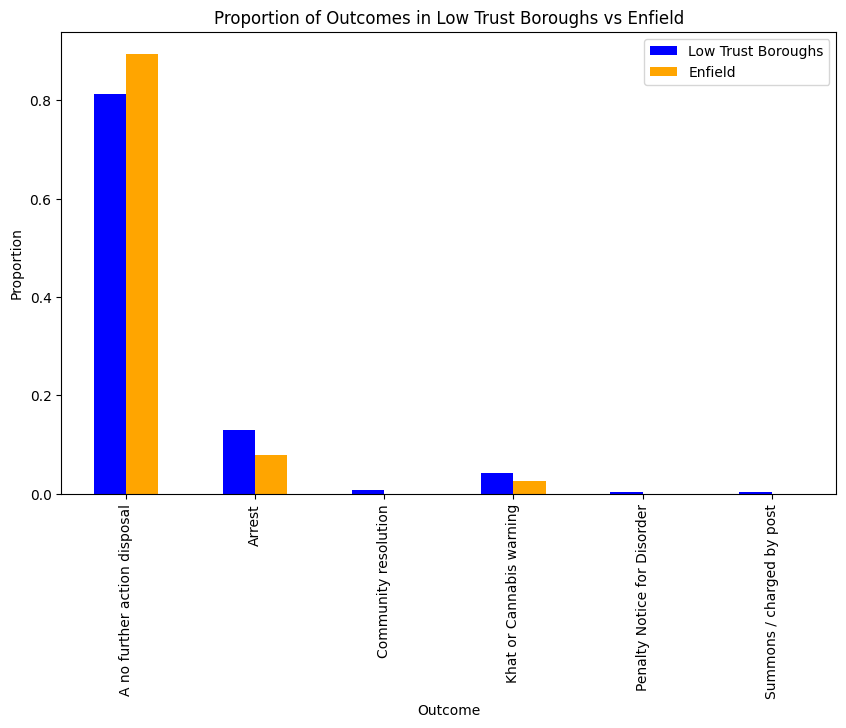

In [56]:
import matplotlib.pyplot as plt

# Plotting
ax = proportions_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

# Adding labels and title
ax.set_xlabel('Outcome')
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Outcomes in Low Trust Boroughs vs Enfield')

# Show the plot
plt.show()

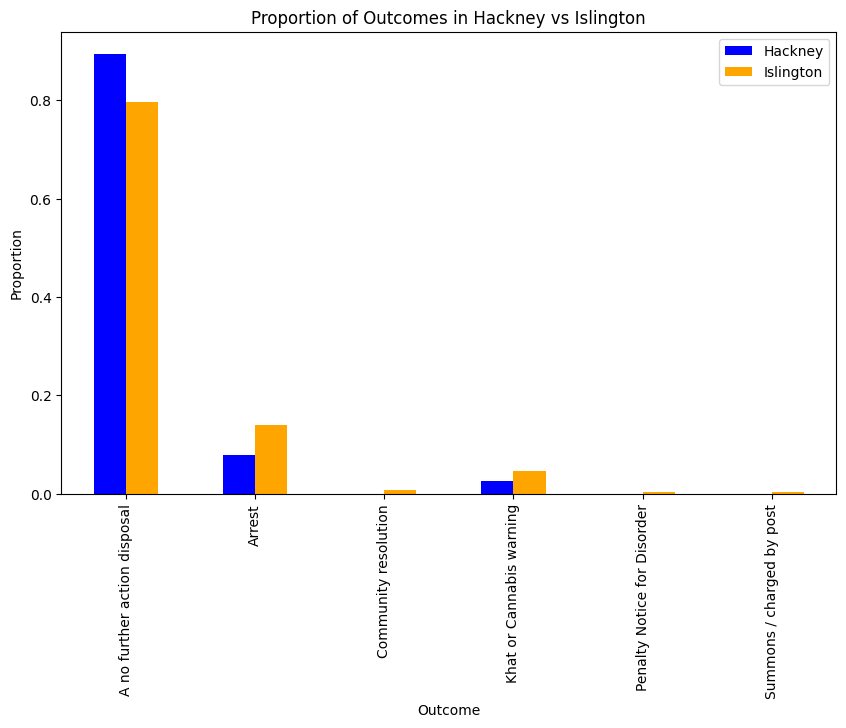

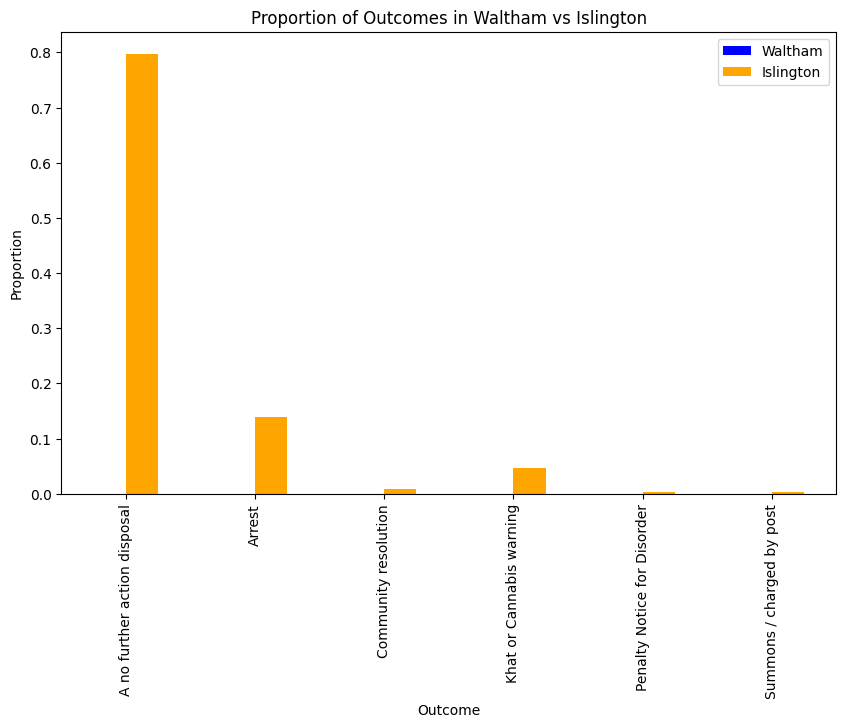

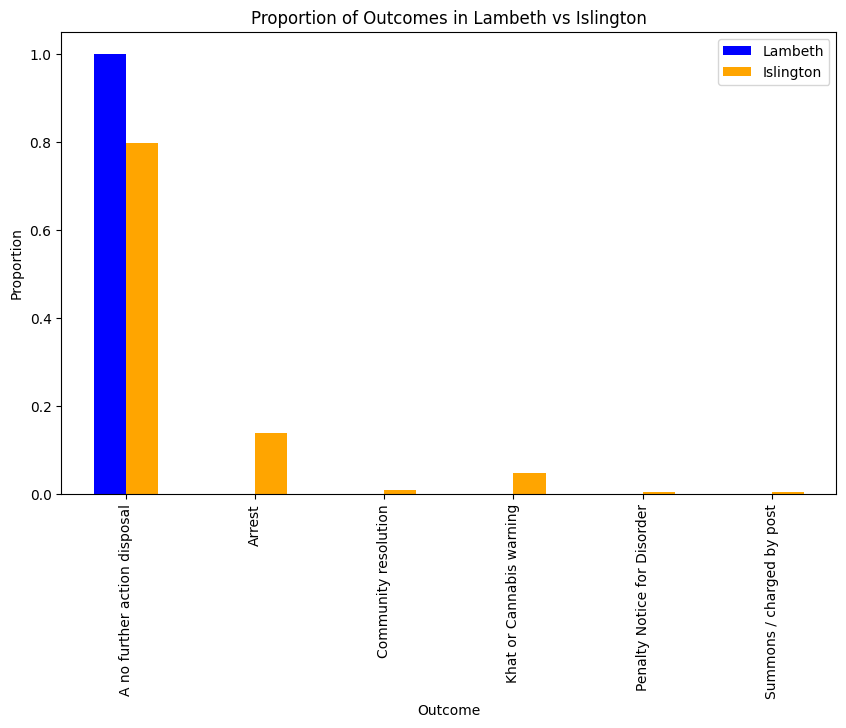

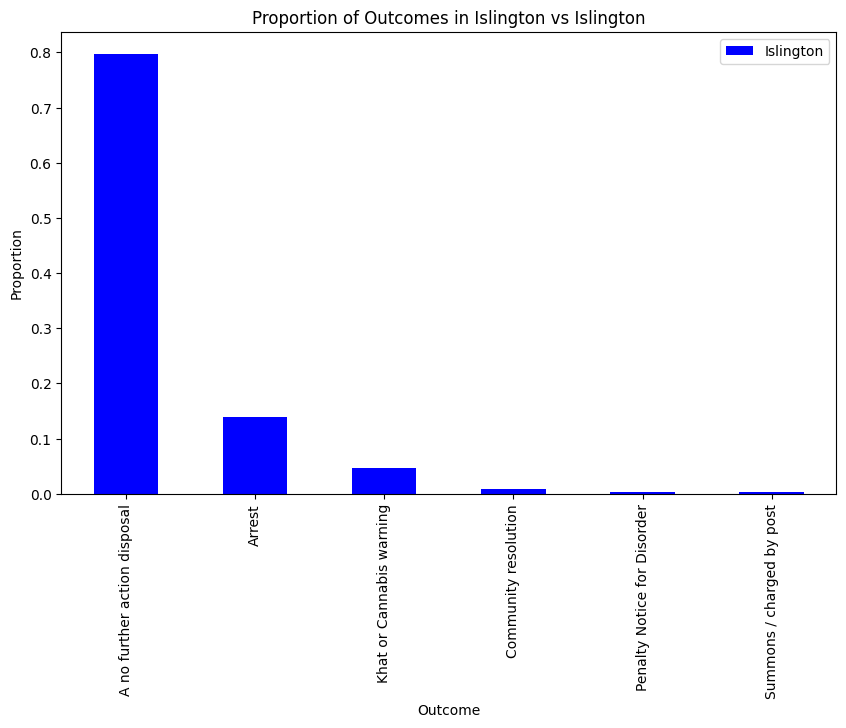

In [71]:
def plot_borough_comparison(low_trust_borough, enfield_df):
    # Filter the low trust borough
    low_trust_df = df2[df2['Borough'] == low_trust_borough]

    # Calculate proportions for the low trust borough
    low_trust_proportions = low_trust_df['Outcome'].value_counts(normalize=True)

    # Calculate proportions for Enfield
    enfield_proportions = enfield_df['Outcome'].value_counts(normalize=True)

    # Create a combined DataFrame for plotting
    proportions_df = pd.DataFrame({
        low_trust_borough: low_trust_proportions,
        'Islington': enfield_proportions
    }).fillna(0)  # Fill NaN with 0 for missing values

    # Plotting
    ax = proportions_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

    # Adding labels and title
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of Outcomes in {low_trust_borough} vs Islington')

    # Show the plot
    plt.show()

# Plot comparisons for each low trust borough
for borough in low_trust_boroughs:
    plot_borough_comparison(borough, enfield_df)

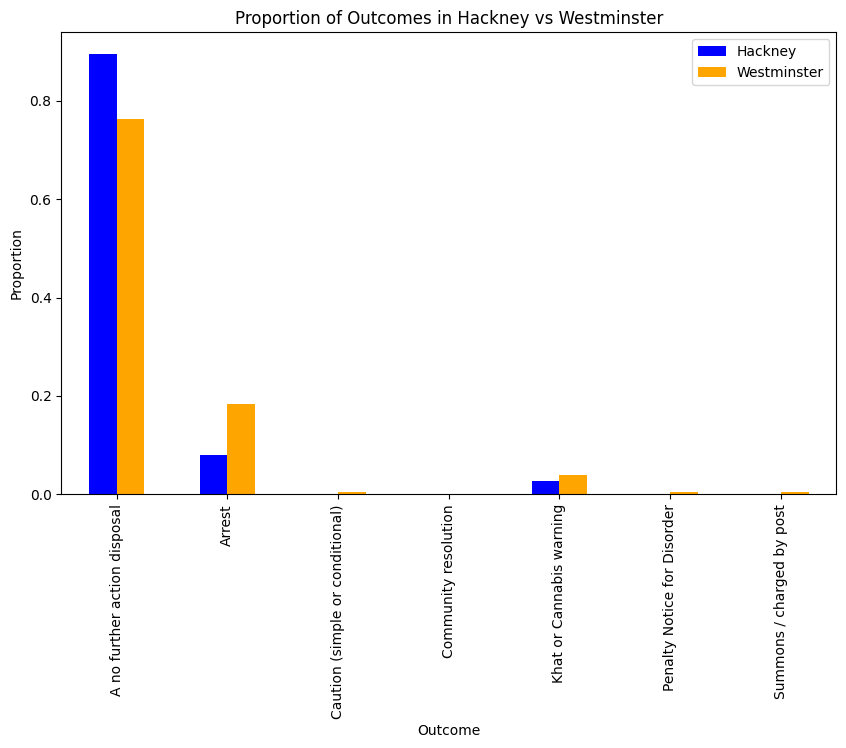

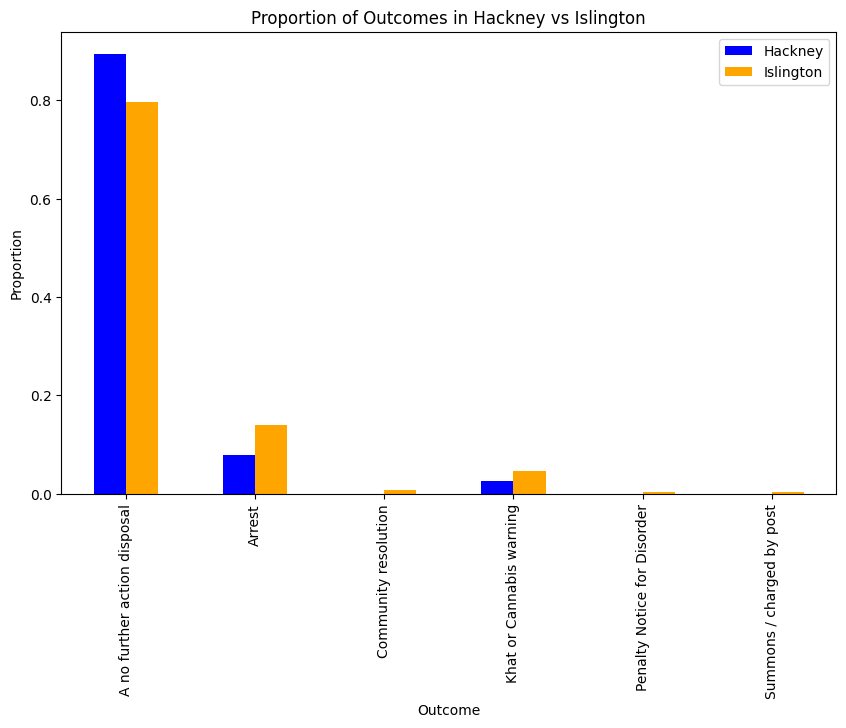

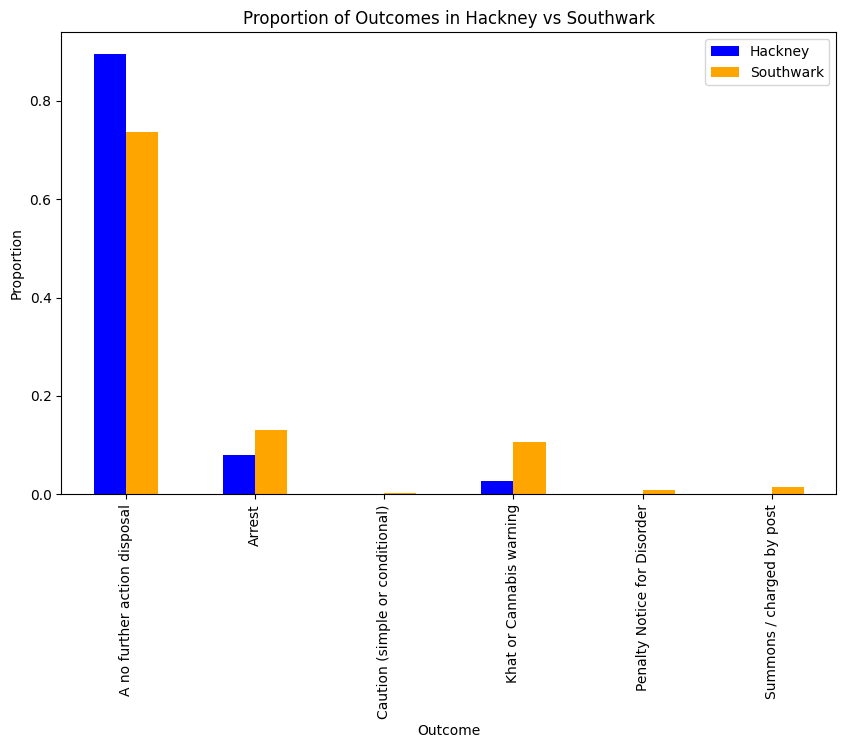

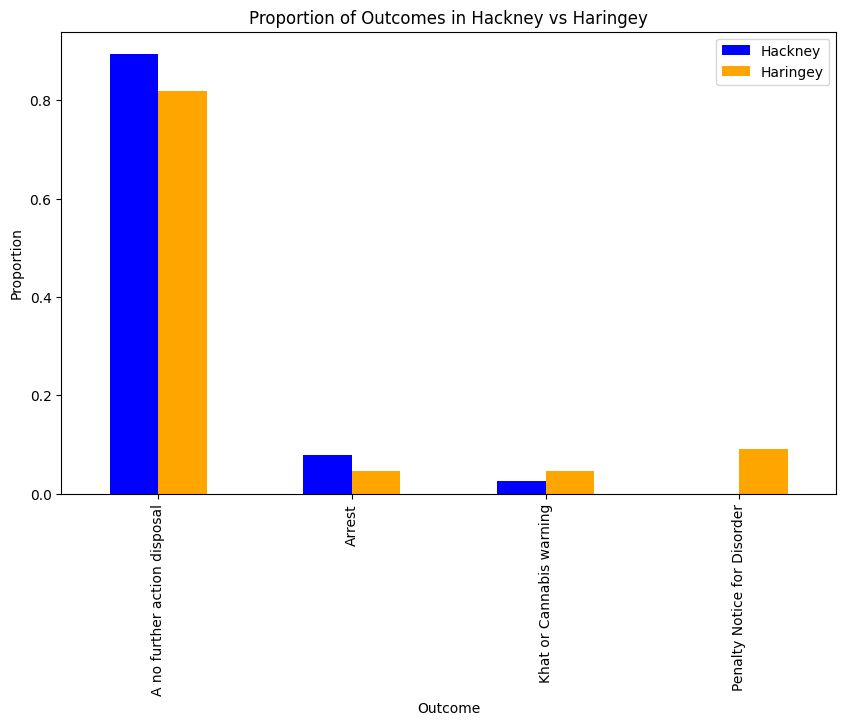

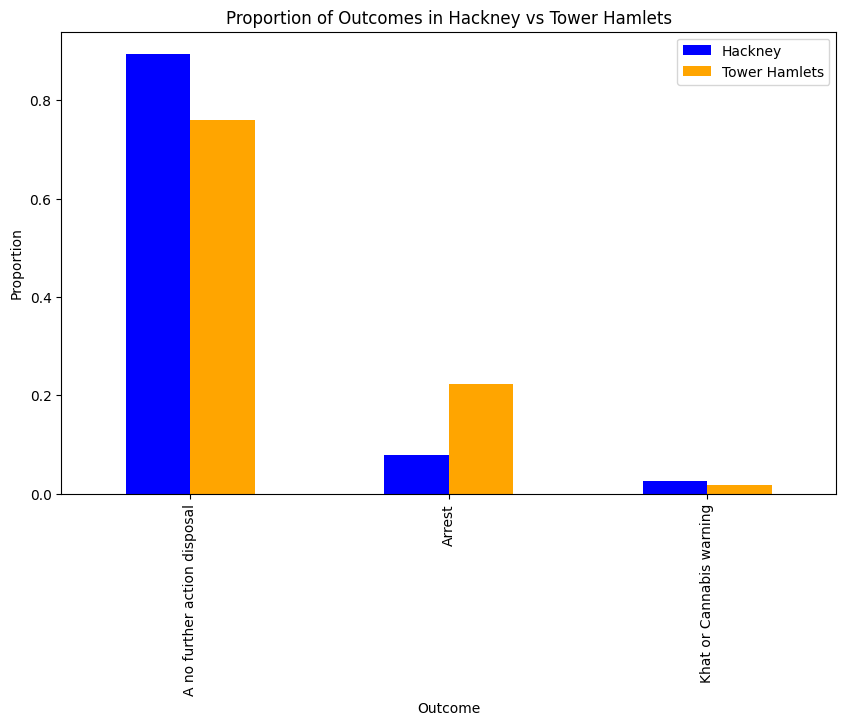

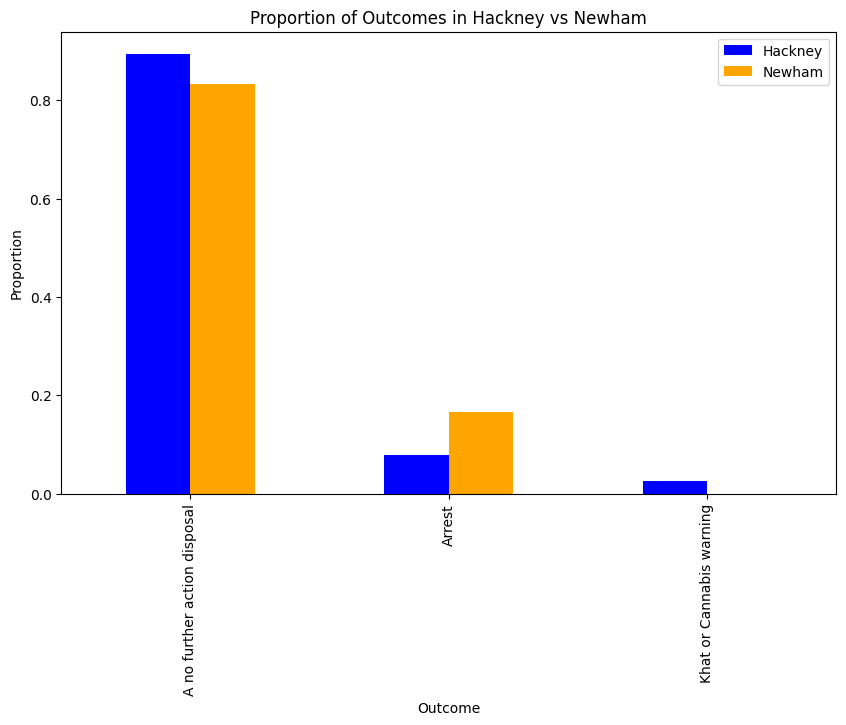

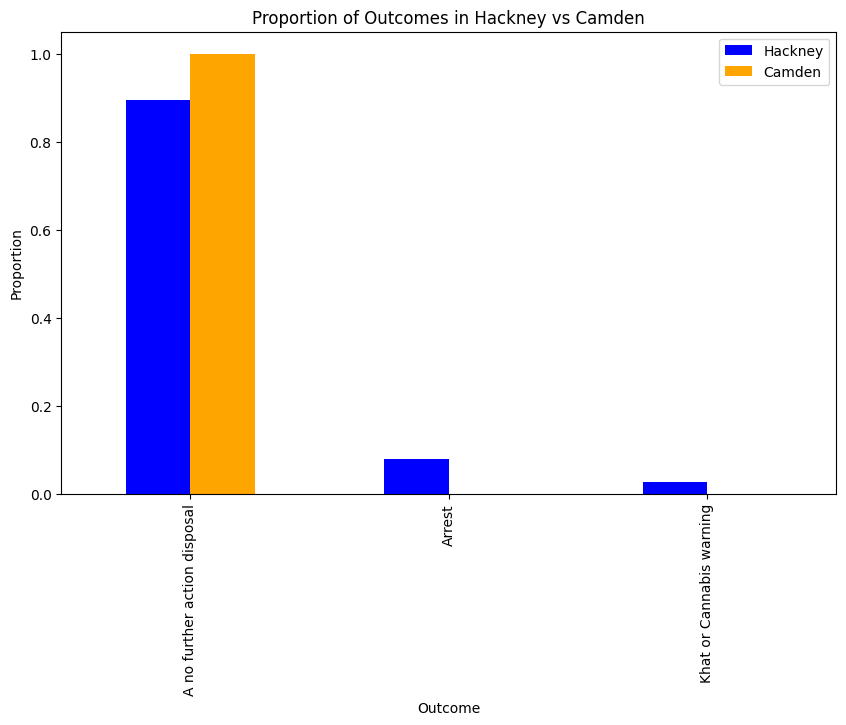

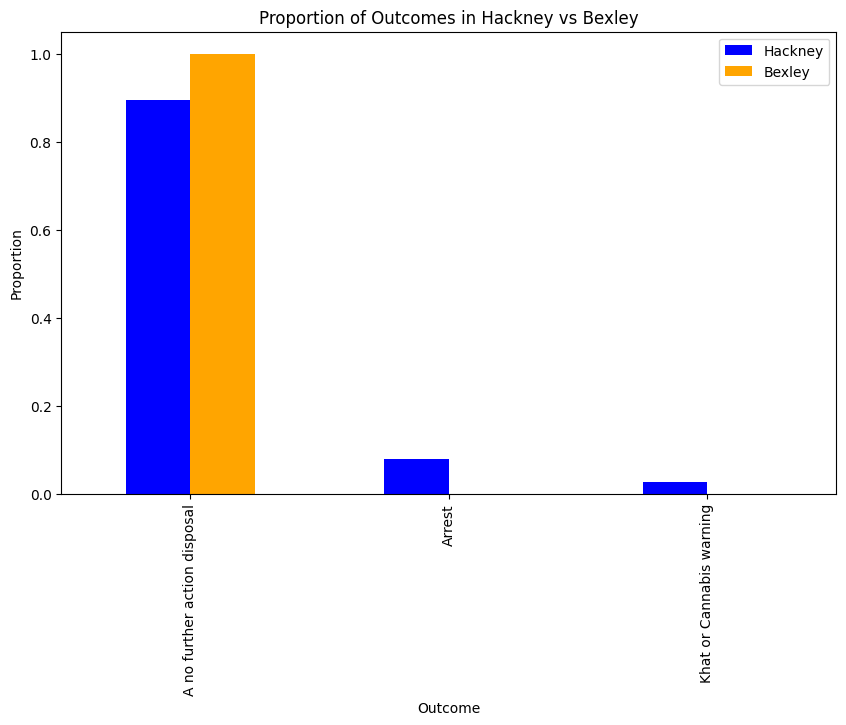

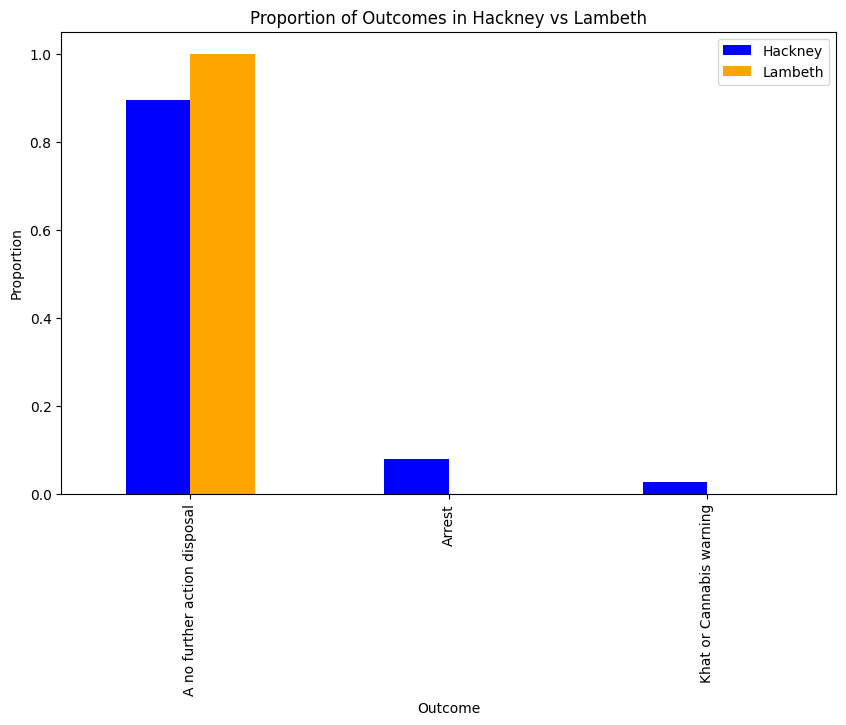

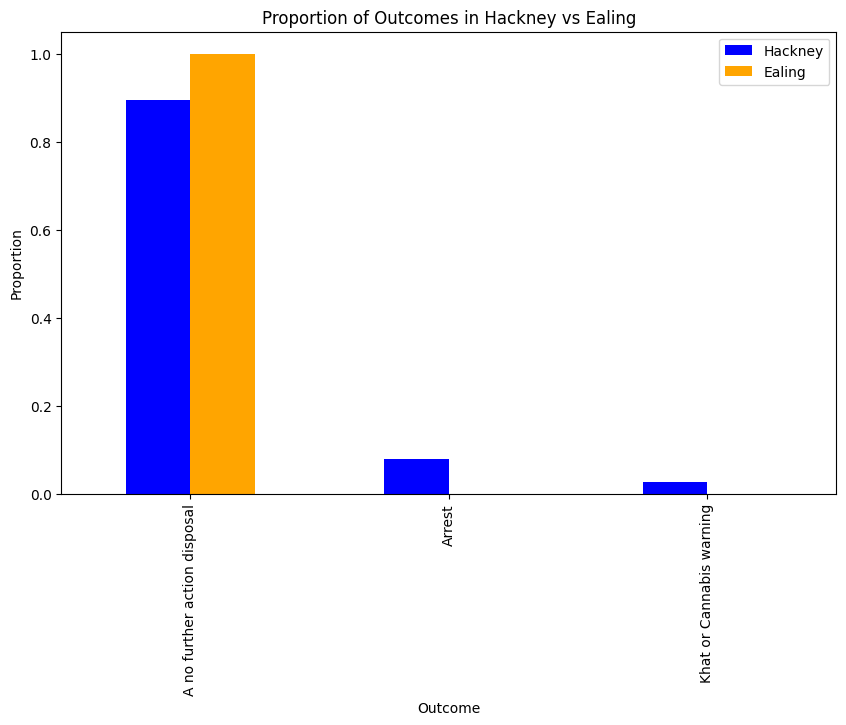

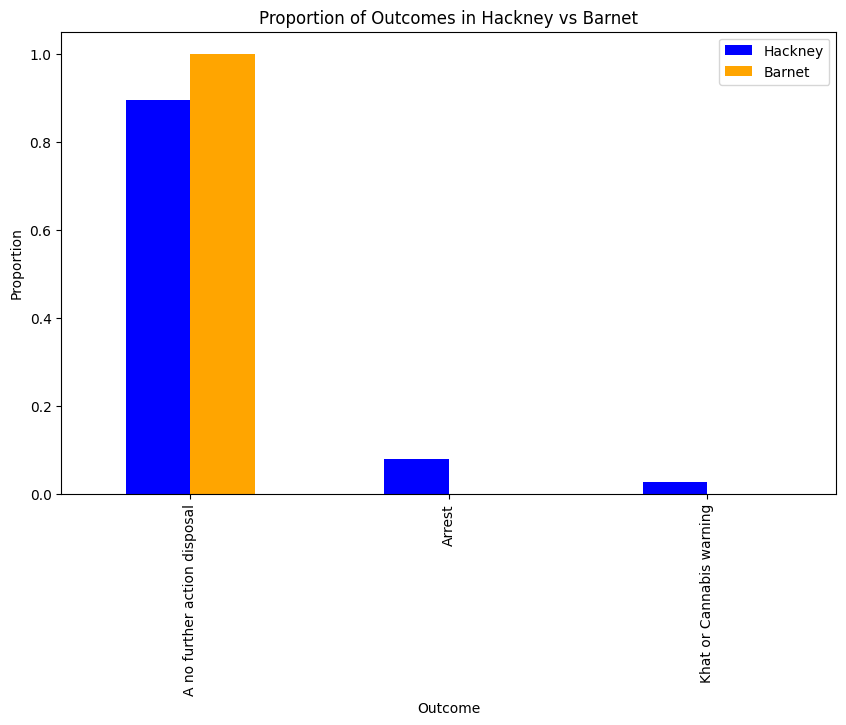

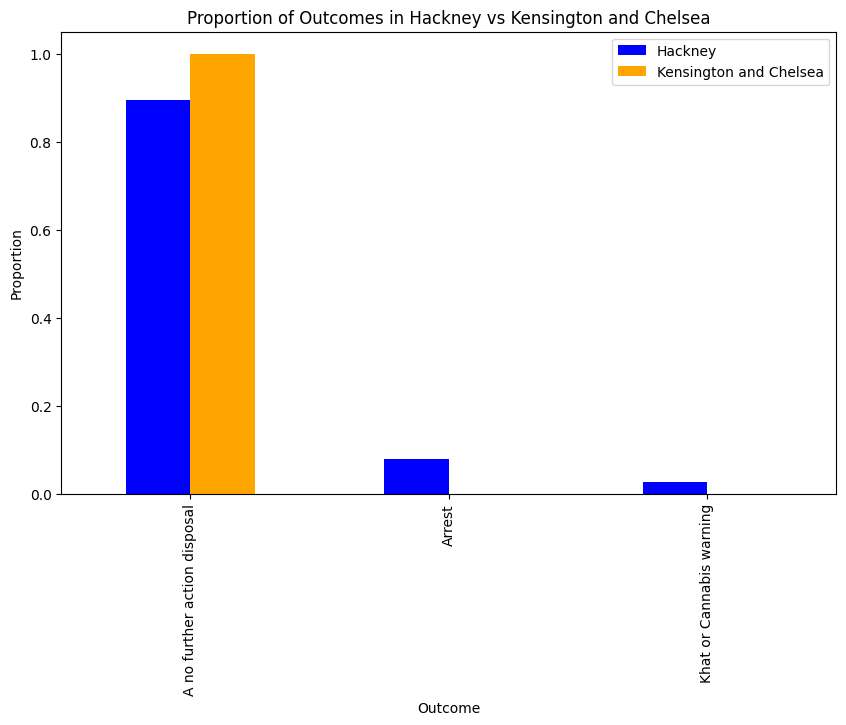

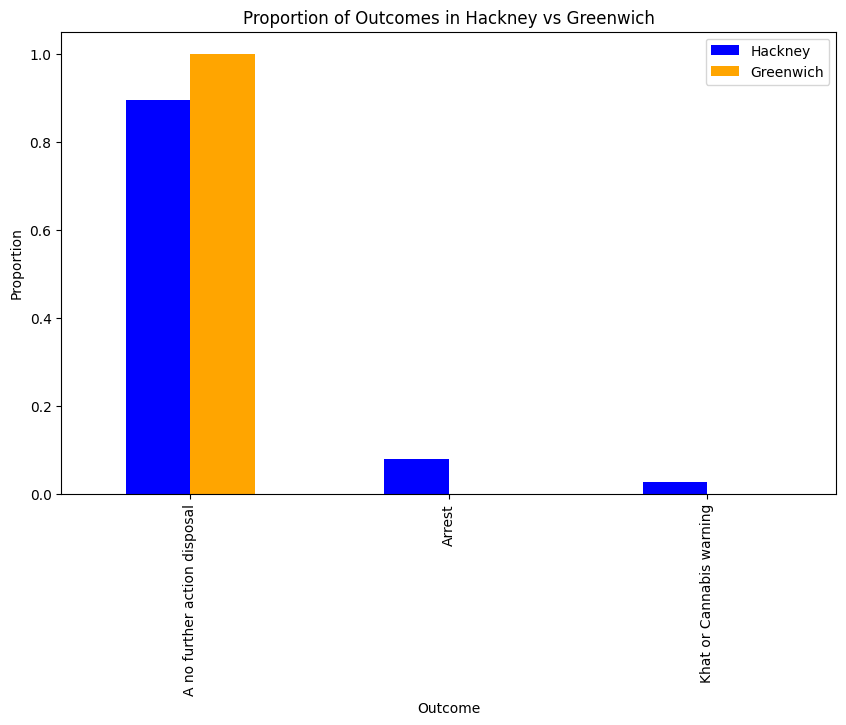

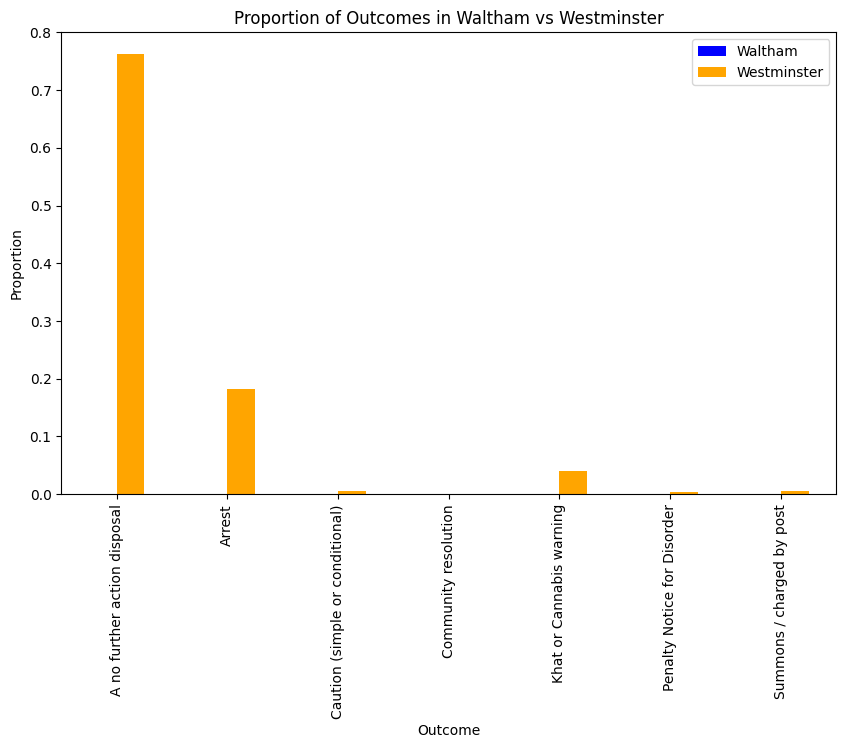

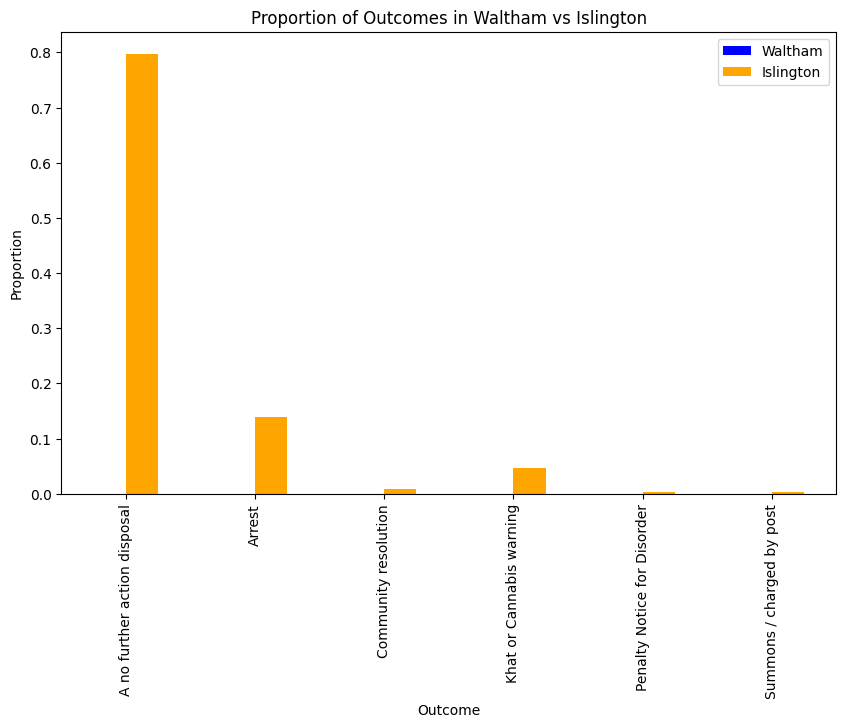

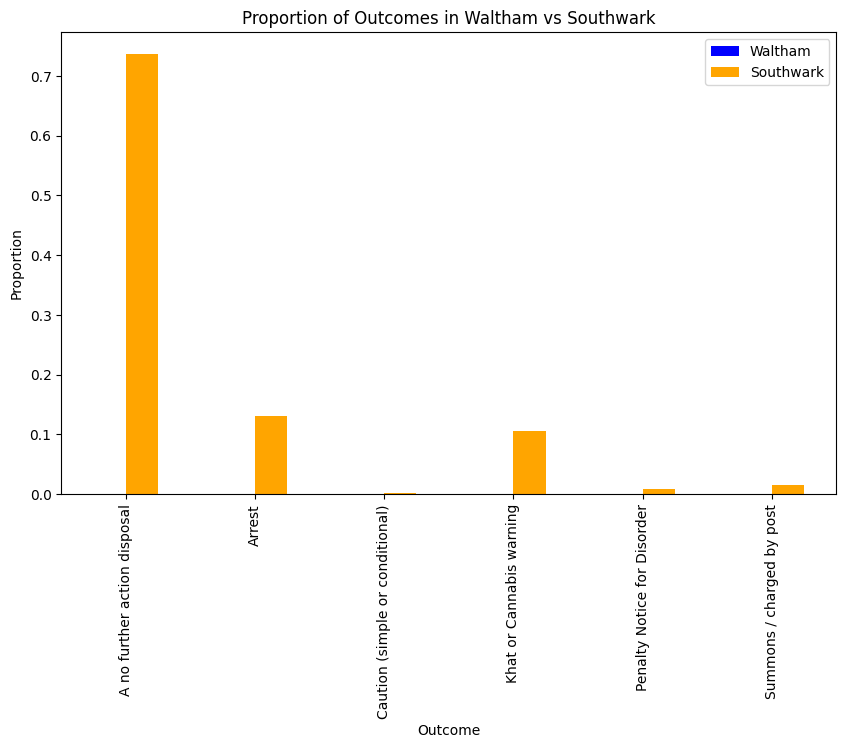

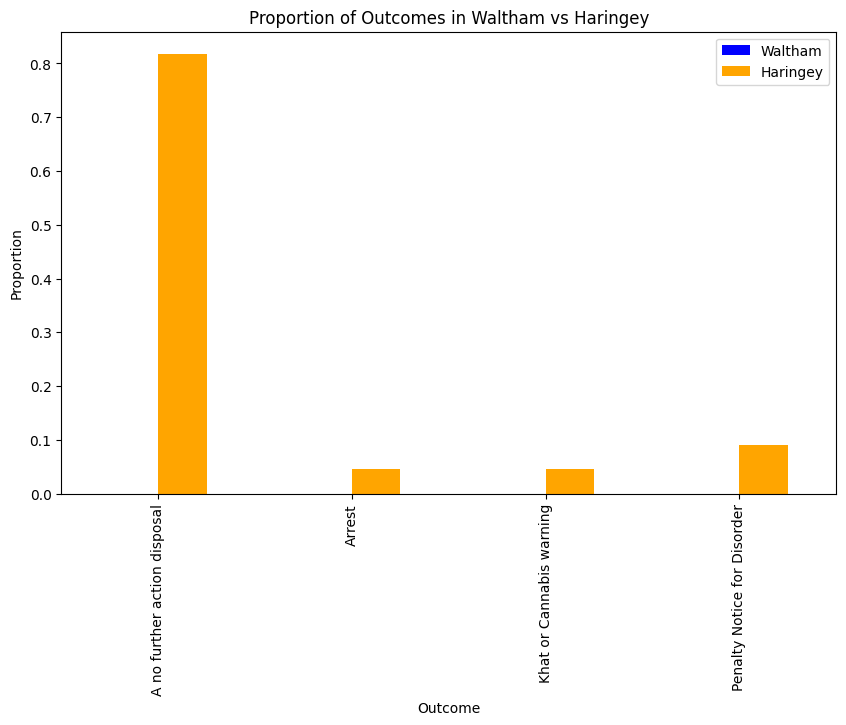

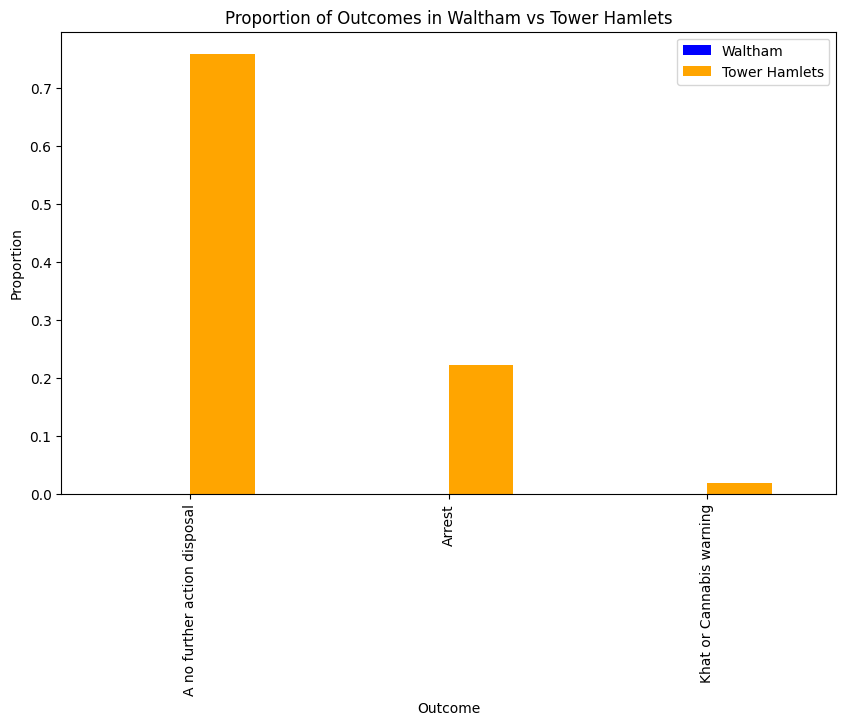

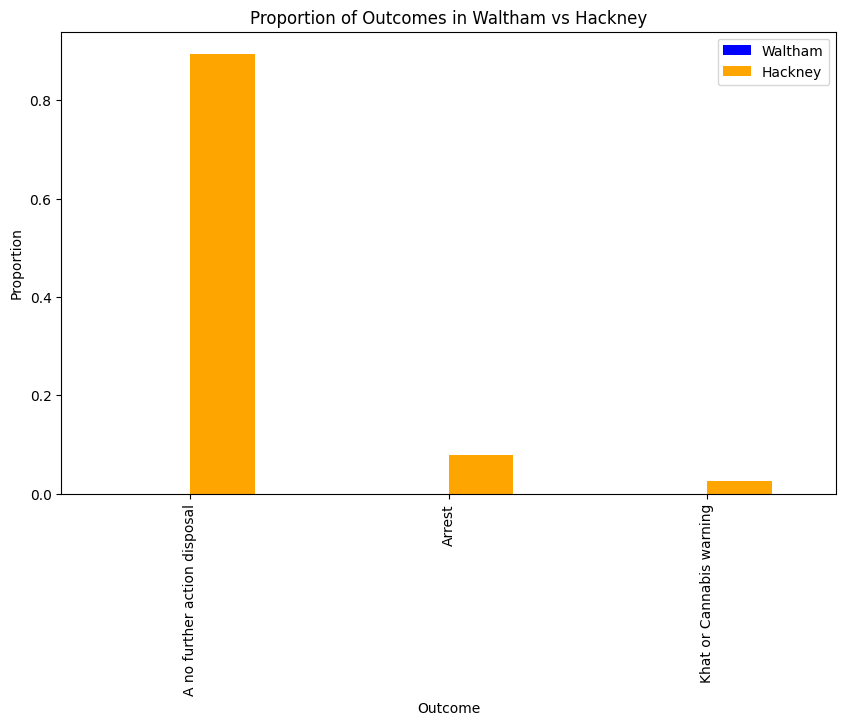

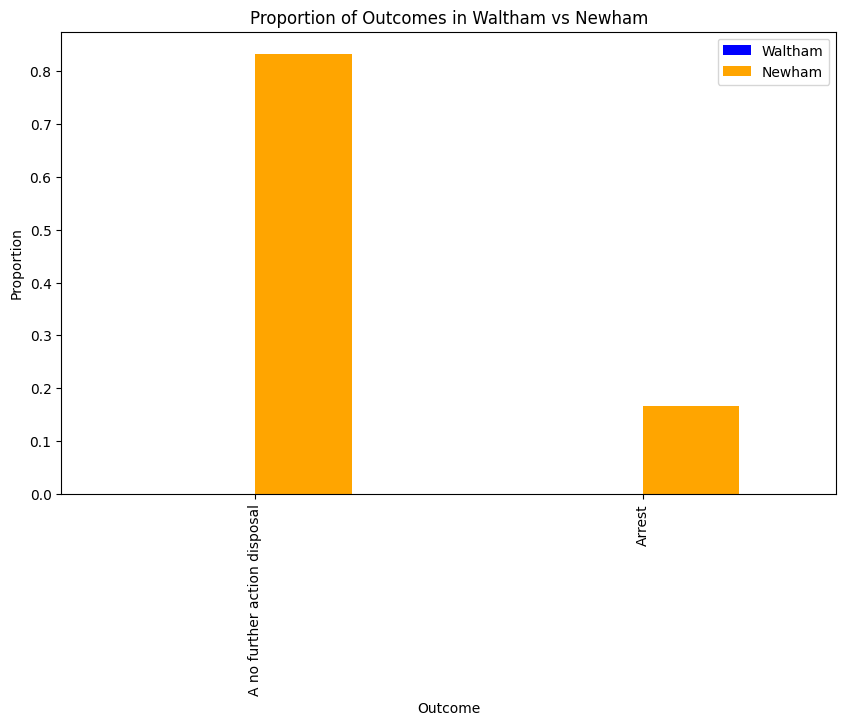

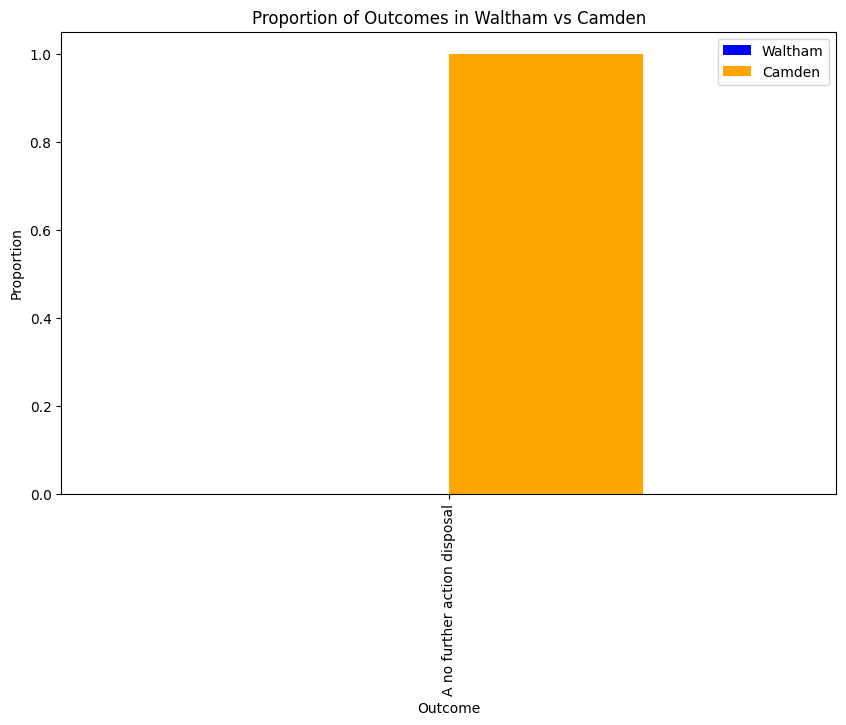

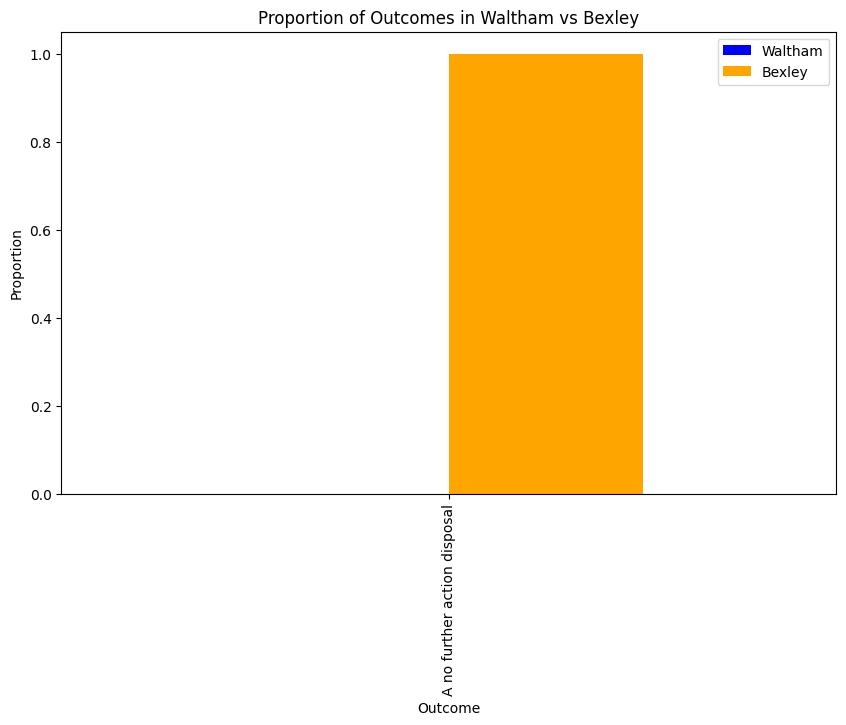

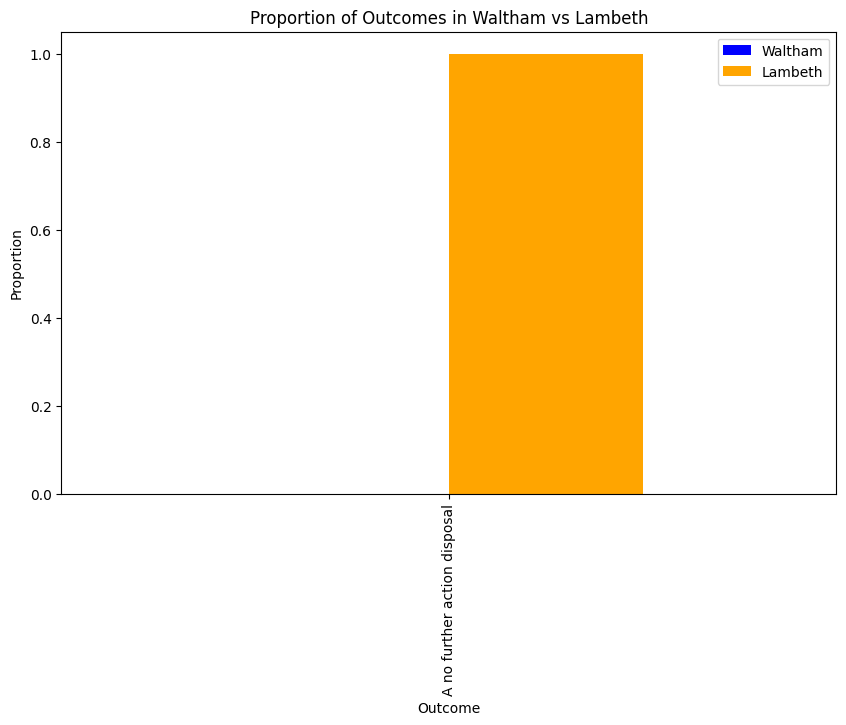

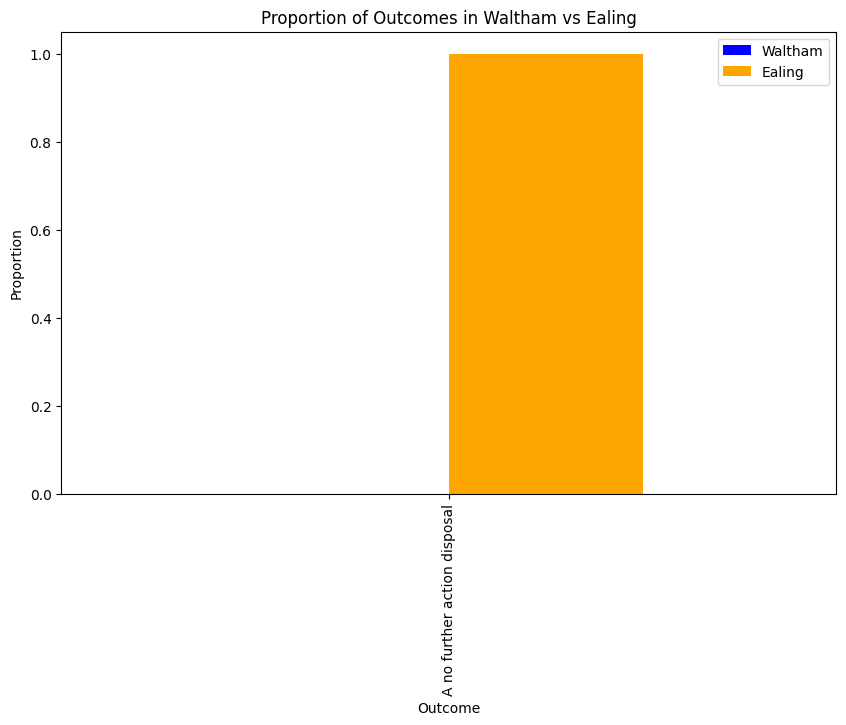

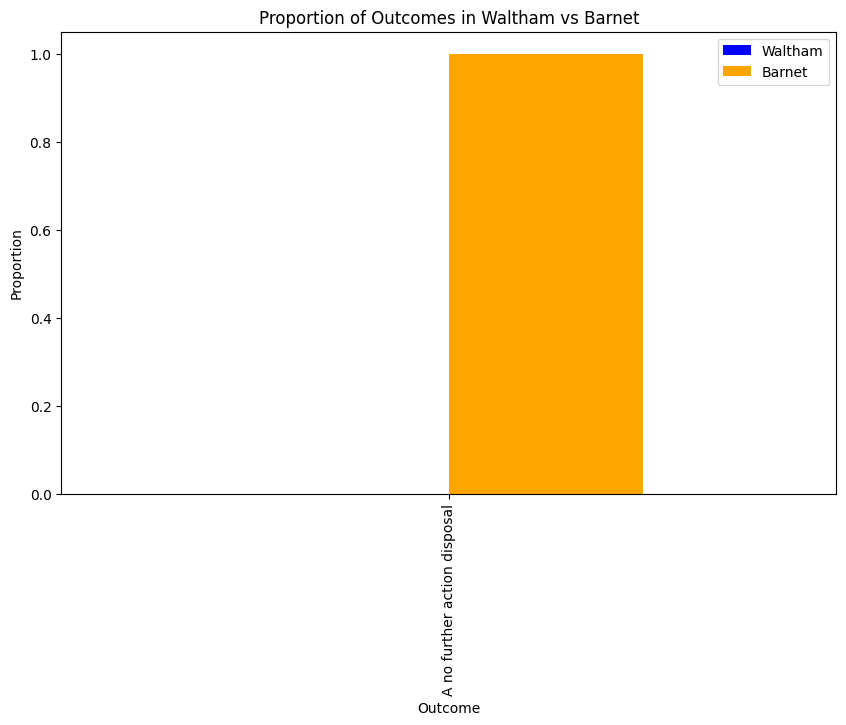

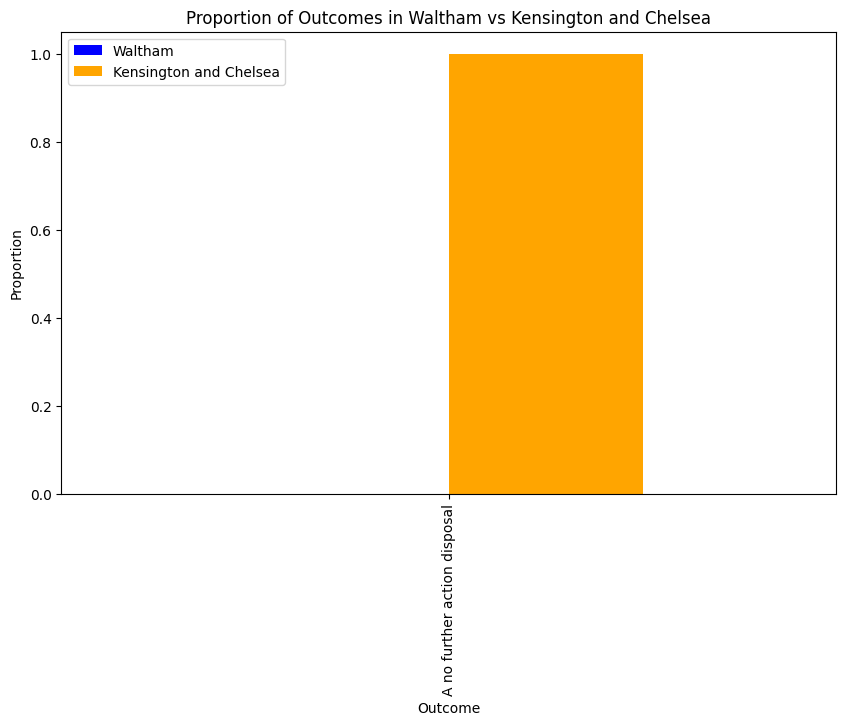

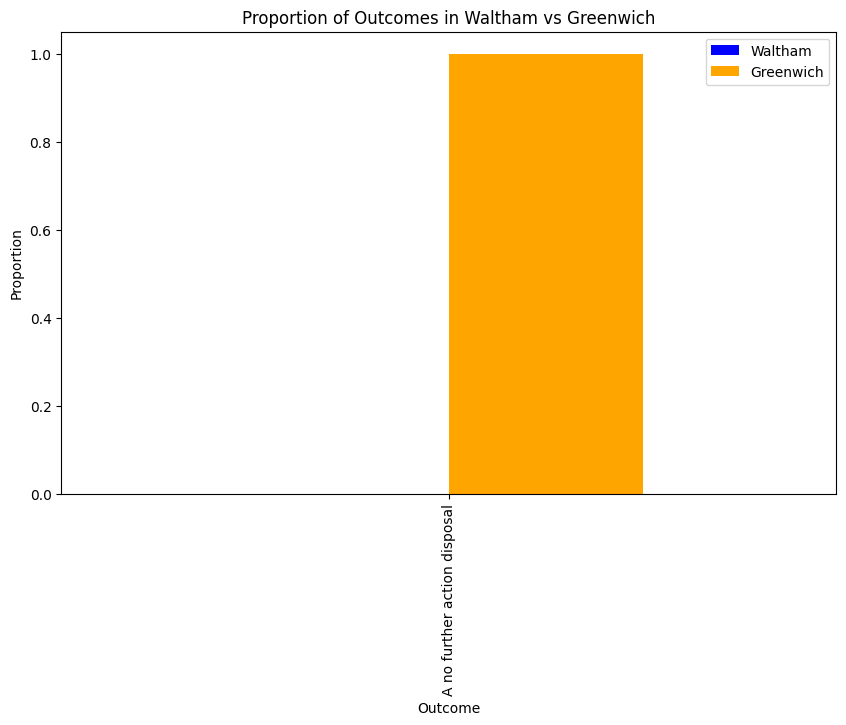

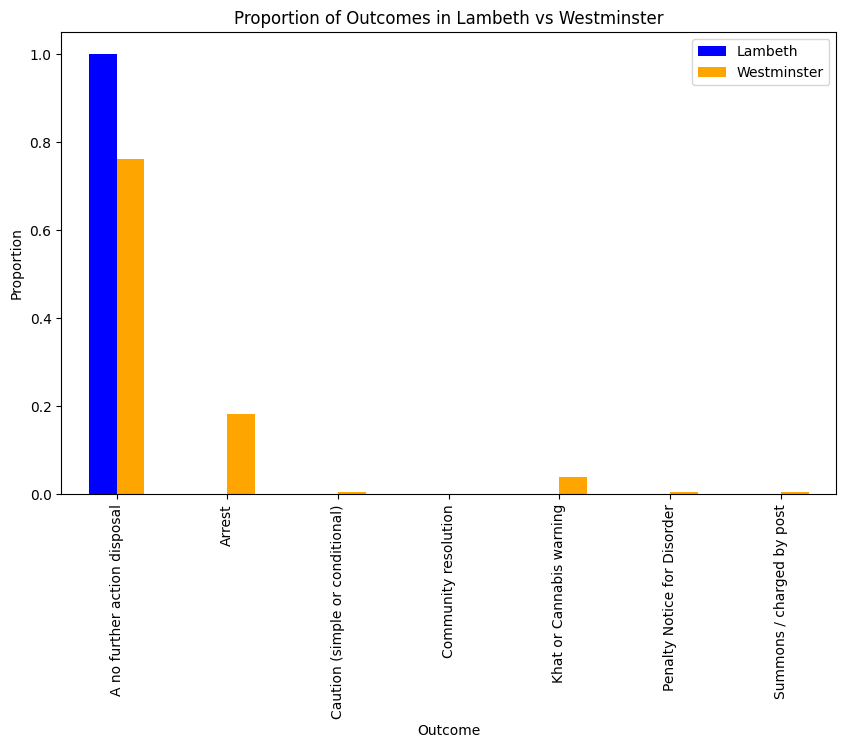

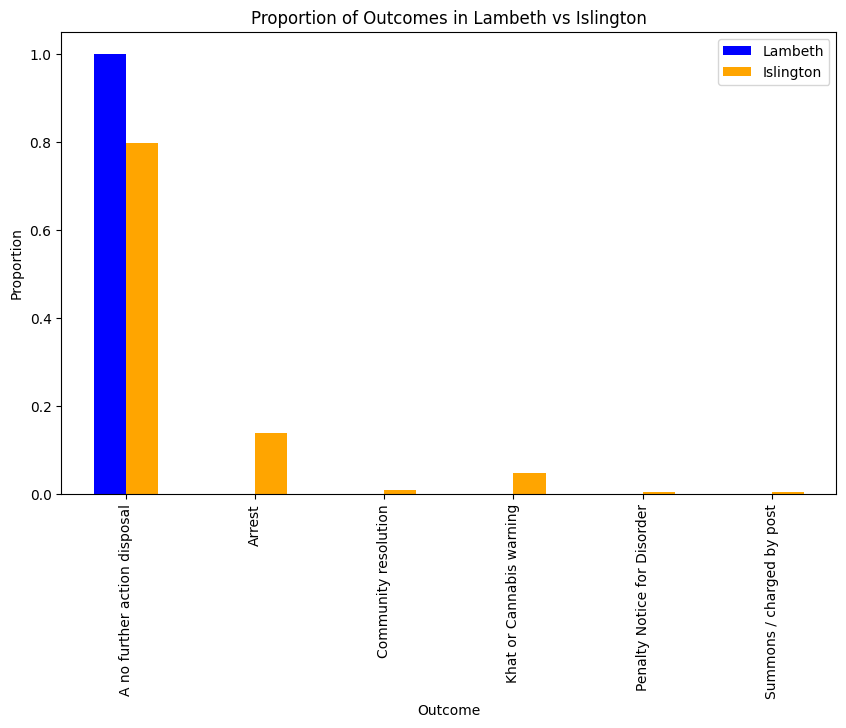

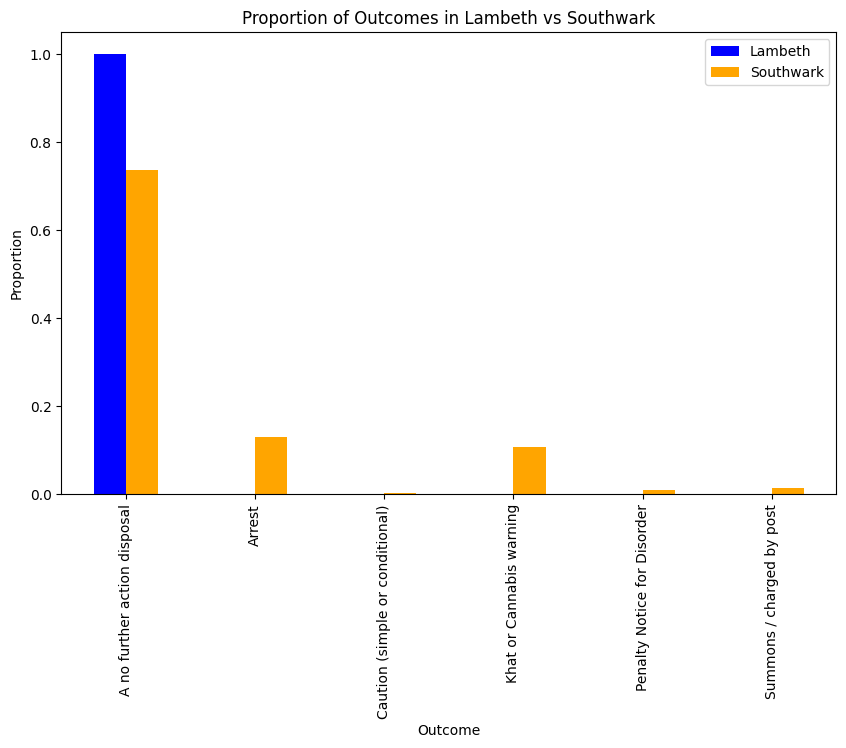

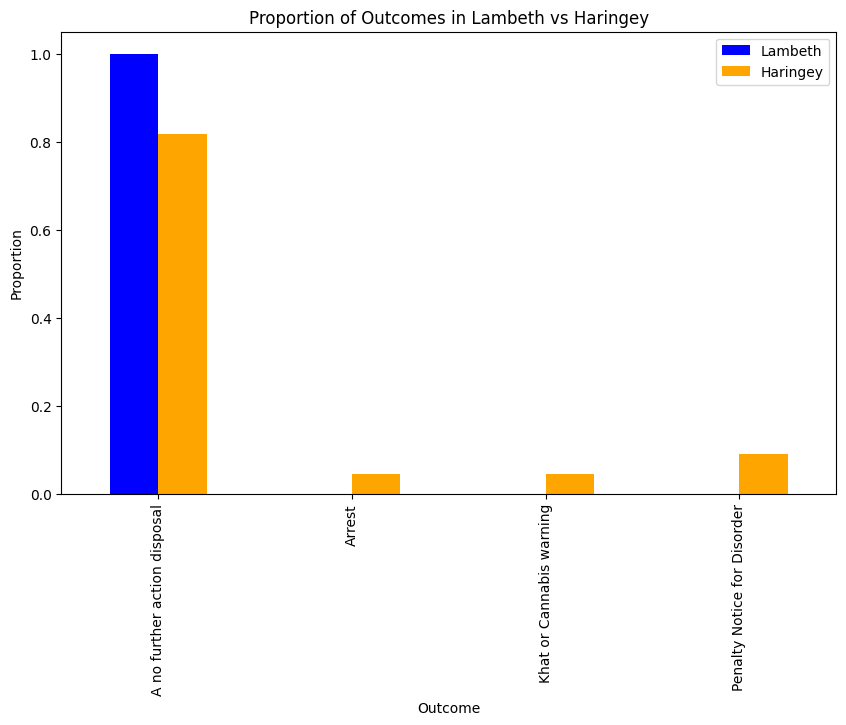

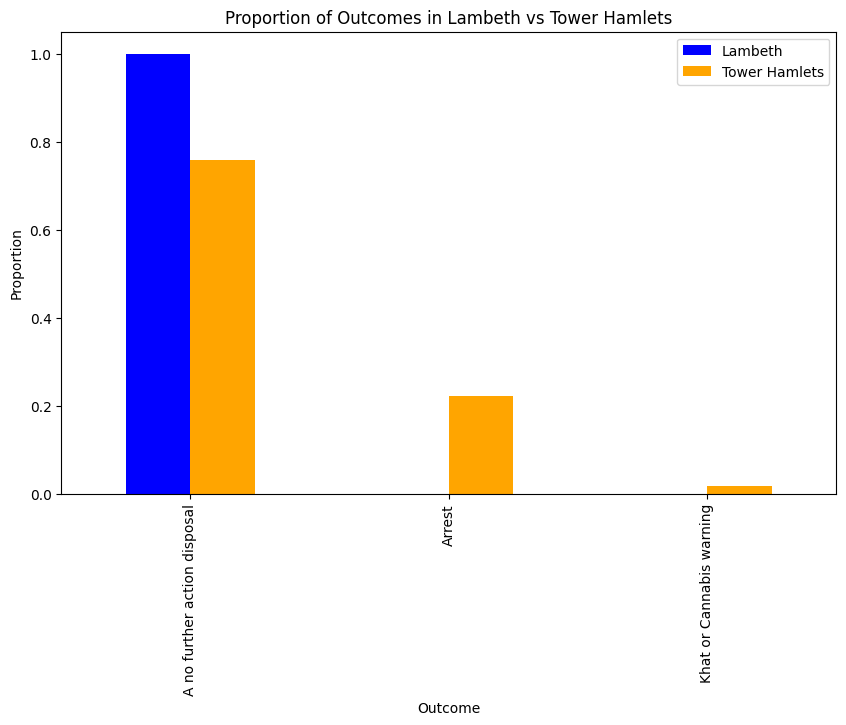

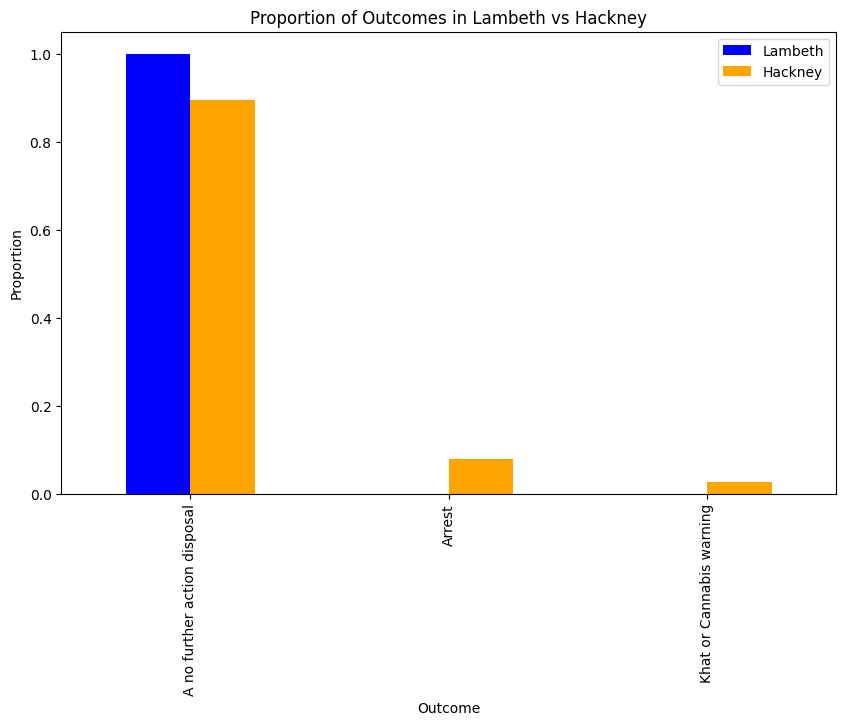

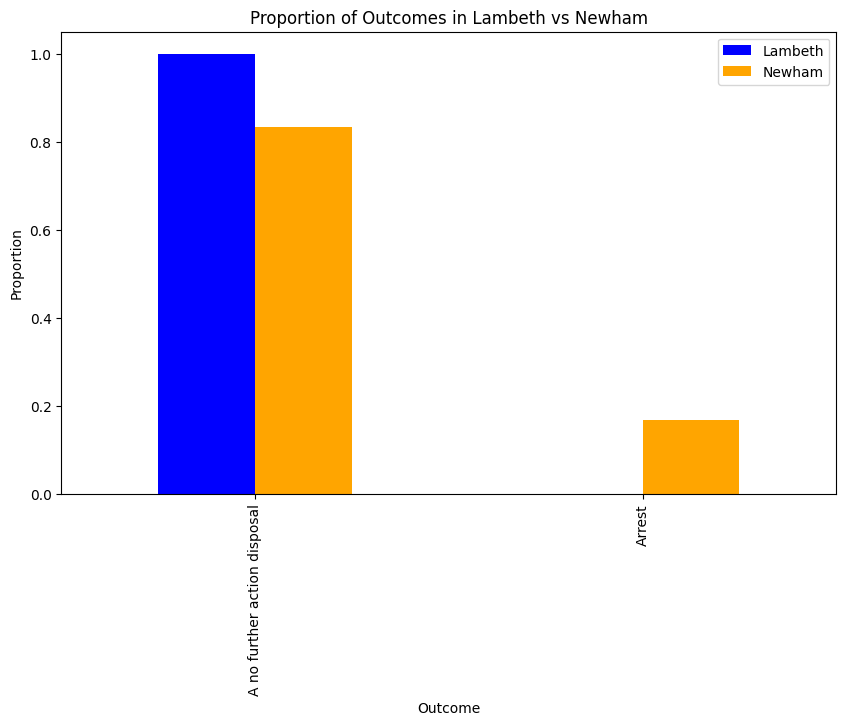

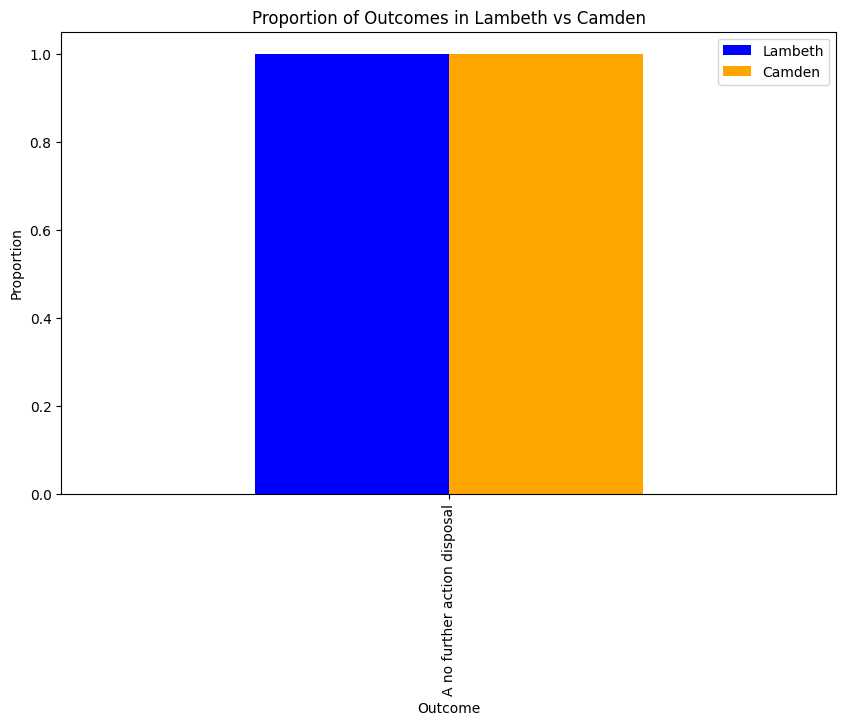

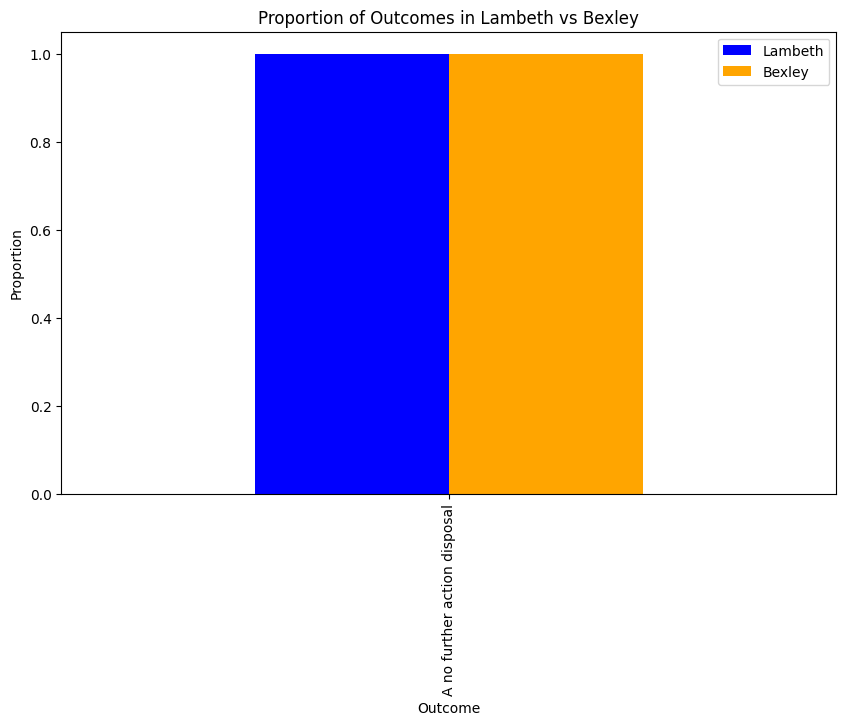

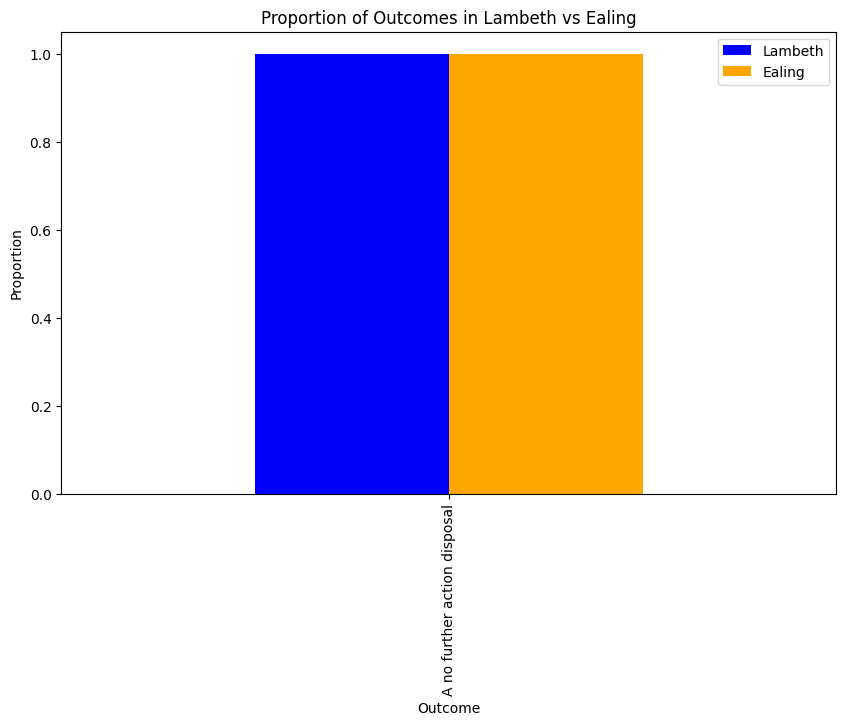

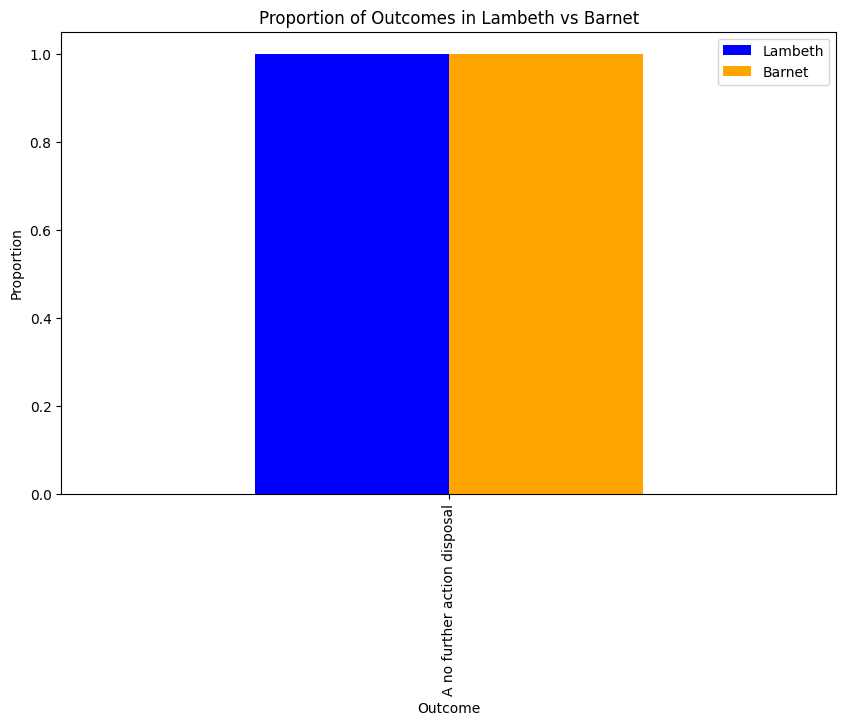

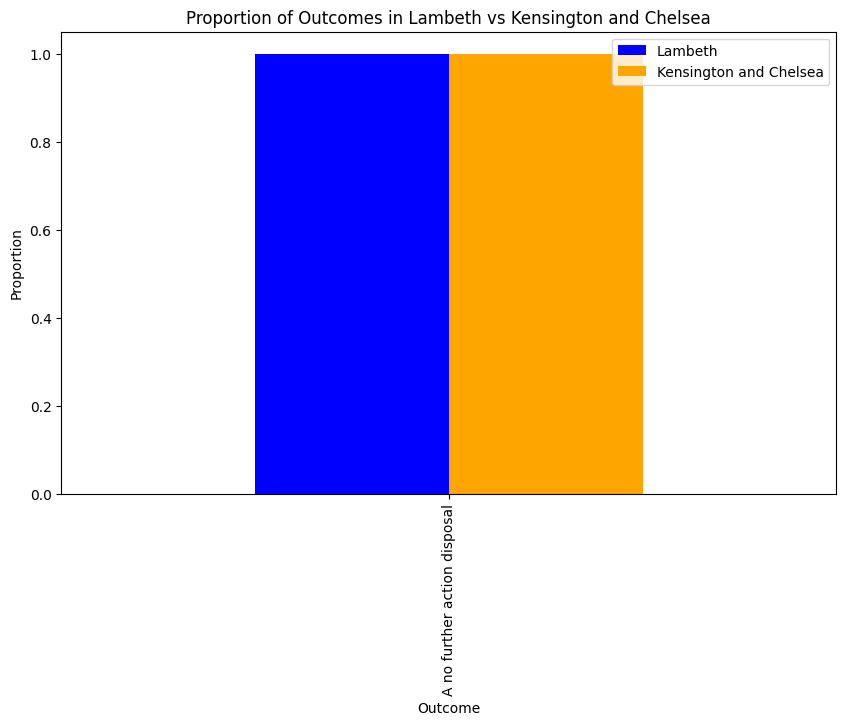

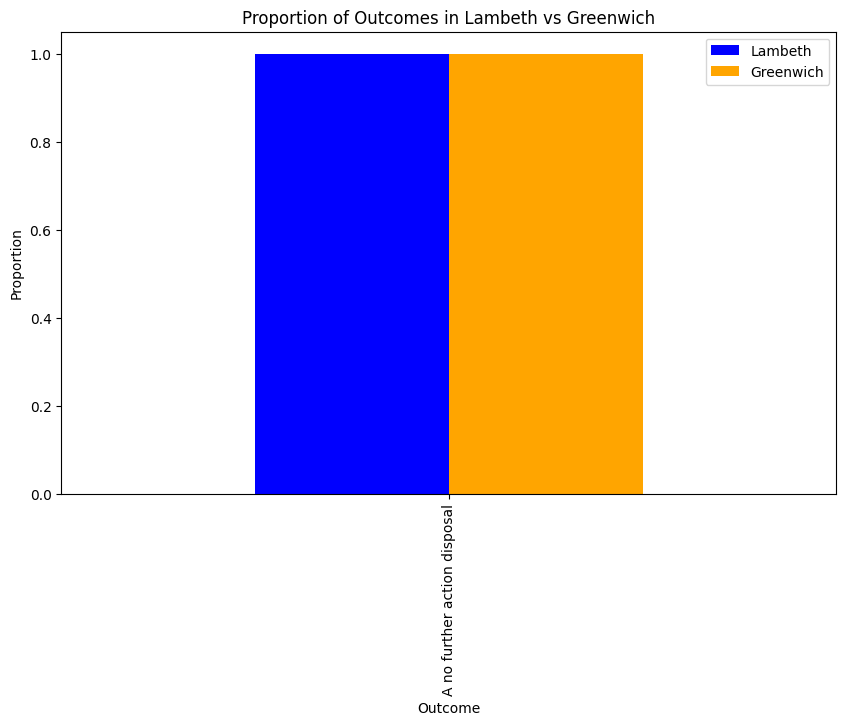

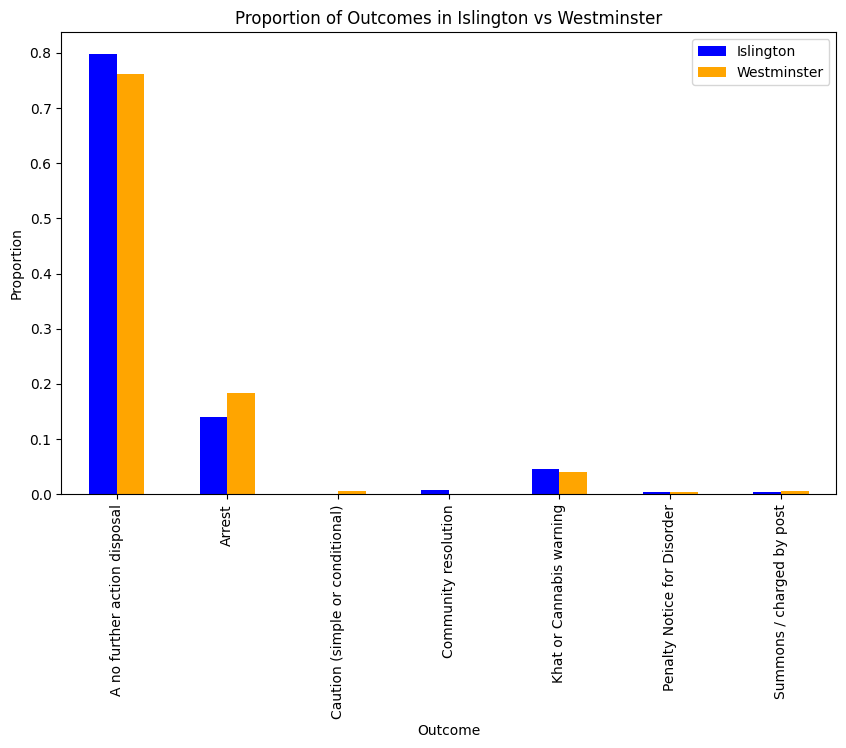

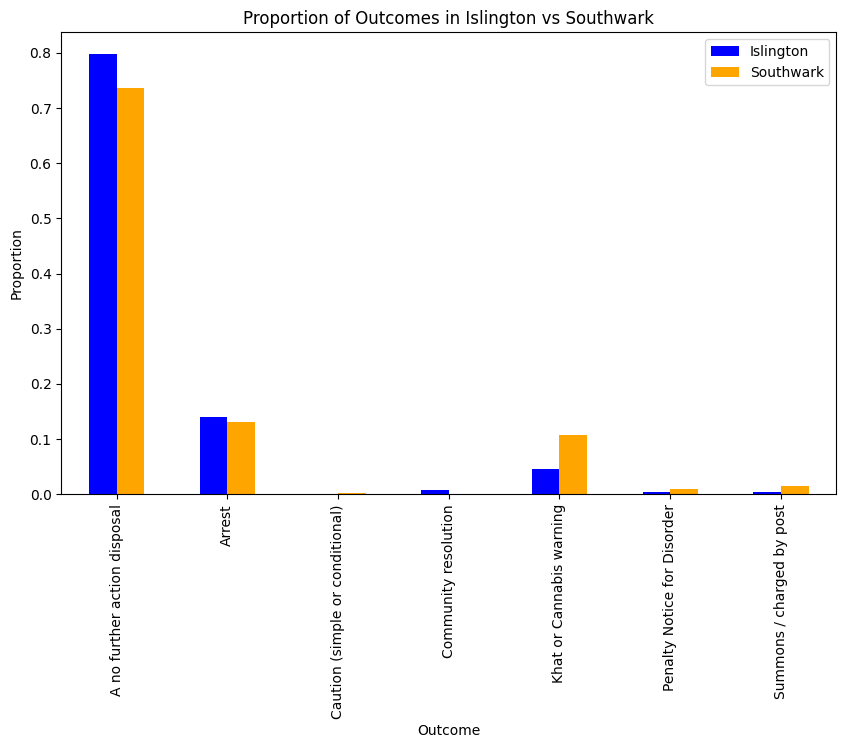

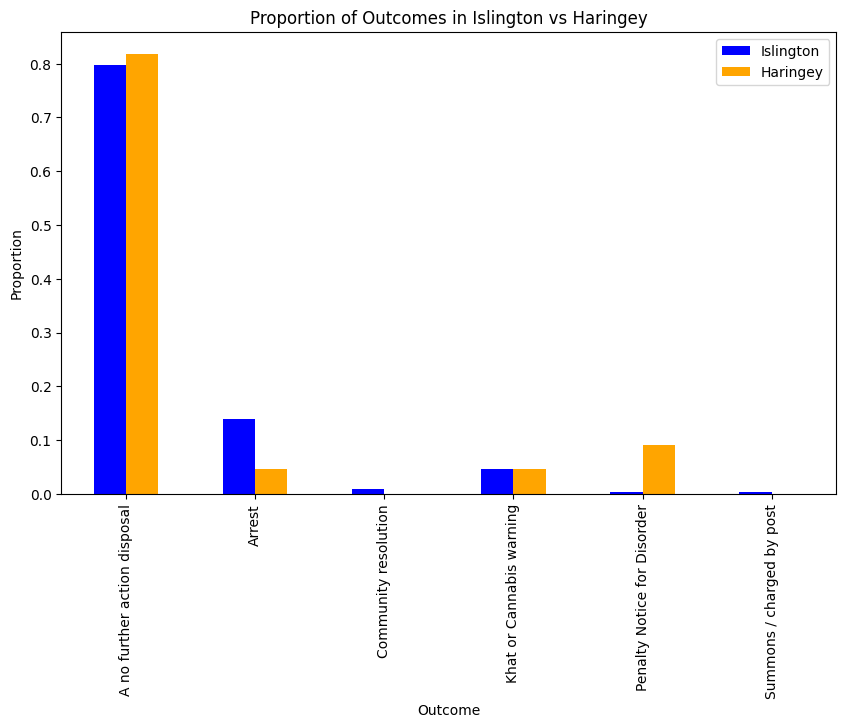

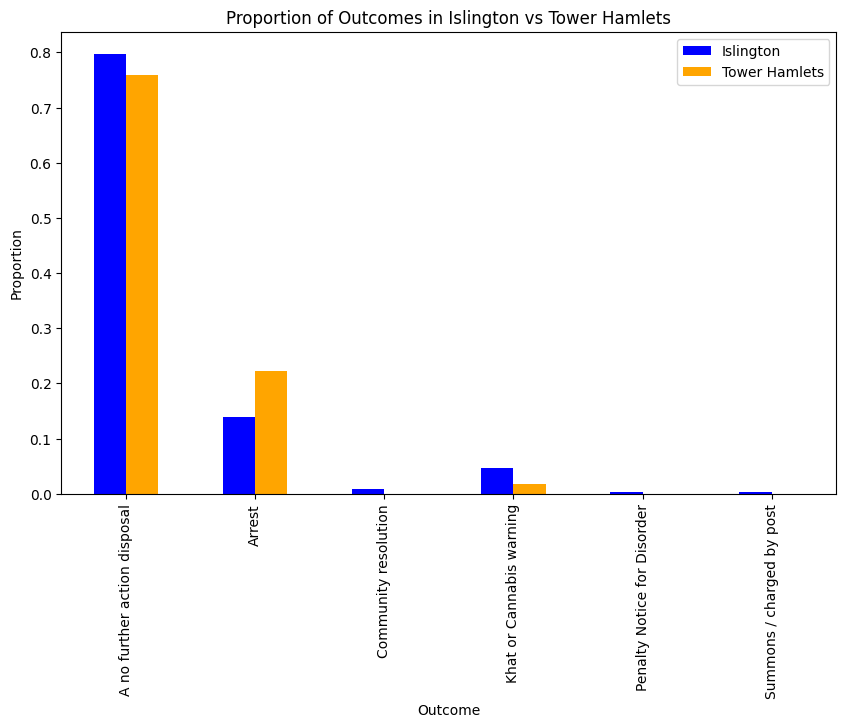

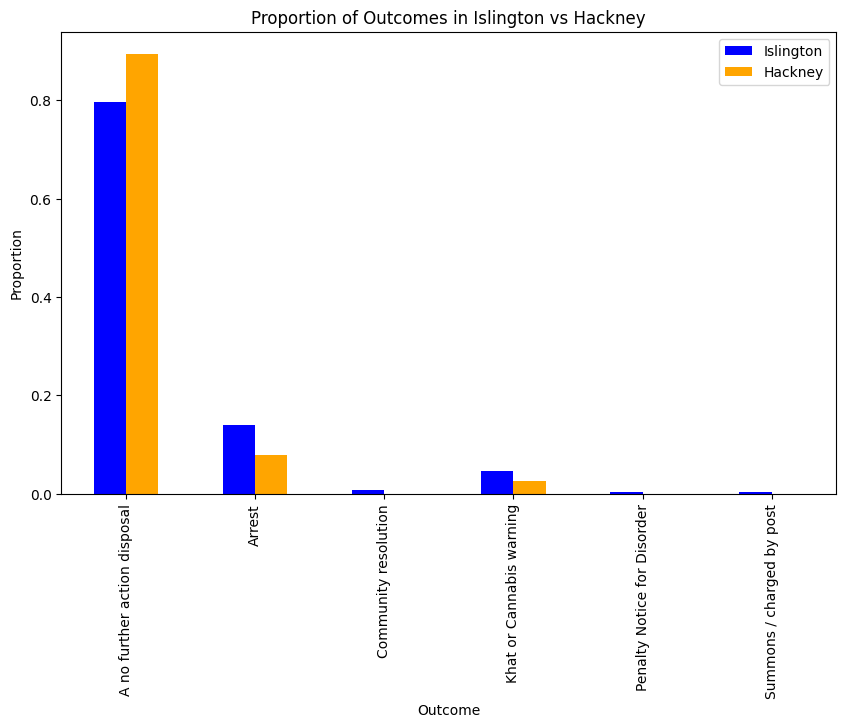

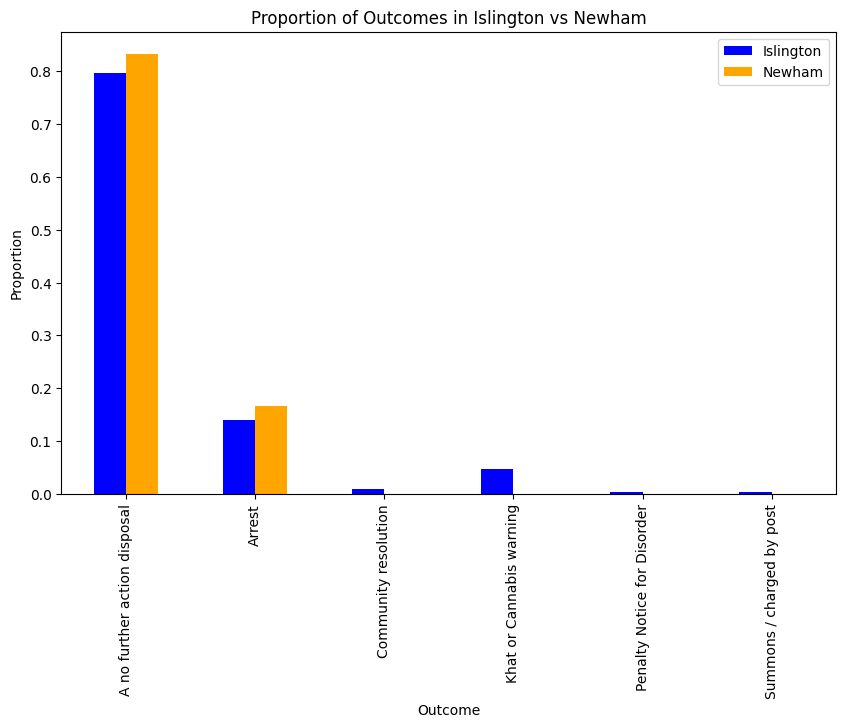

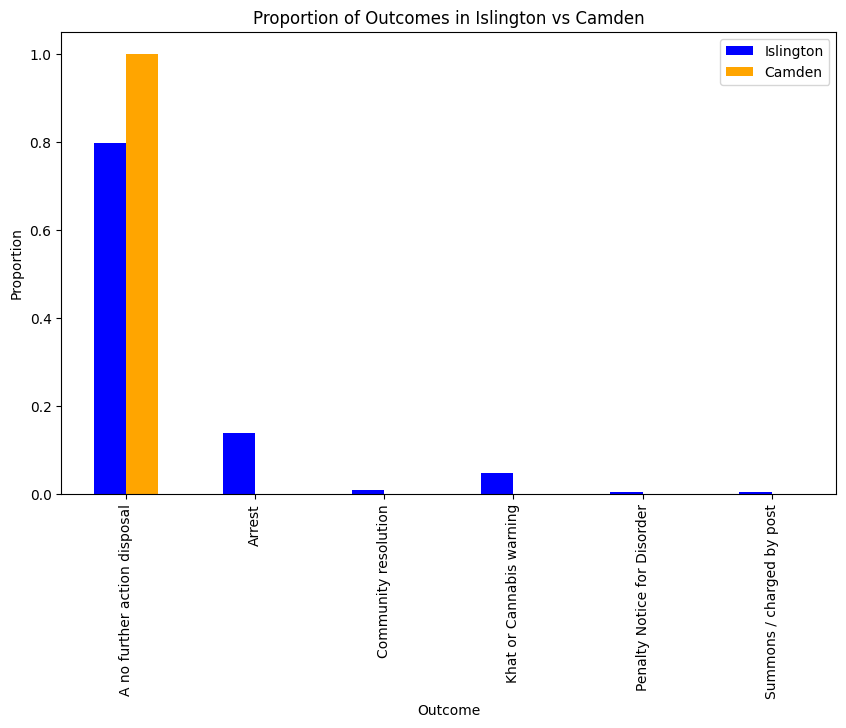

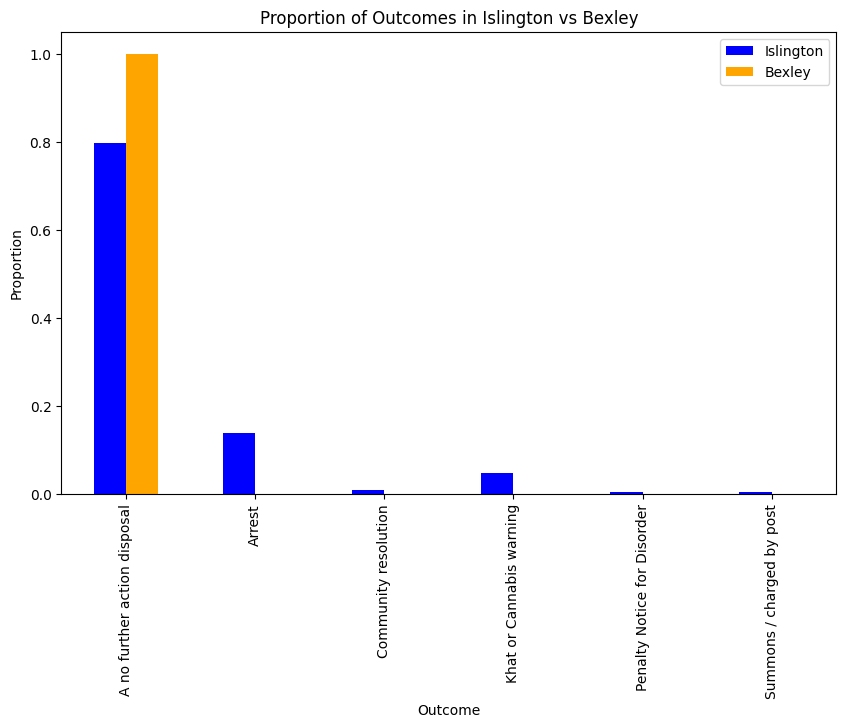

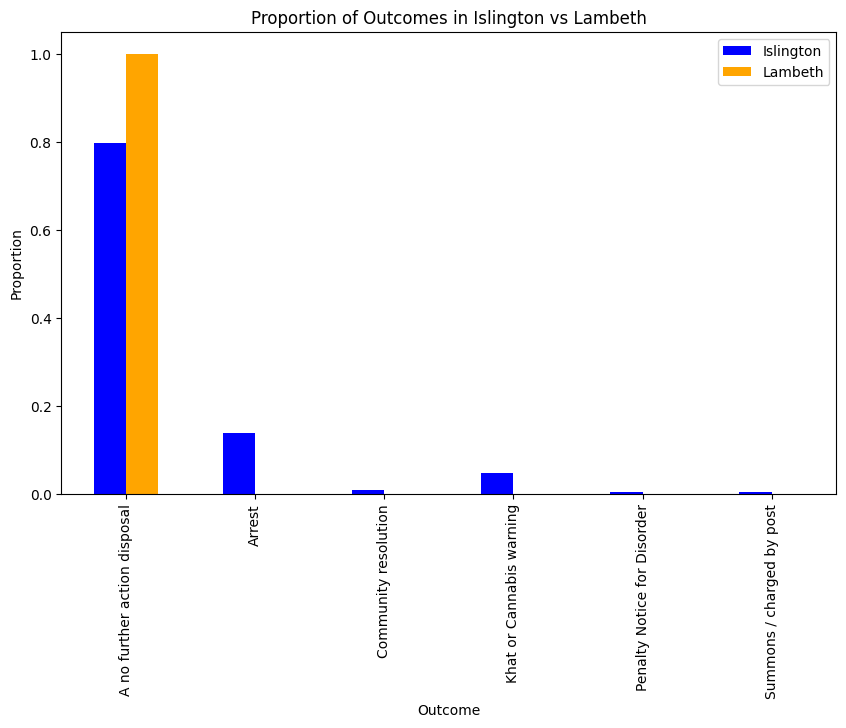

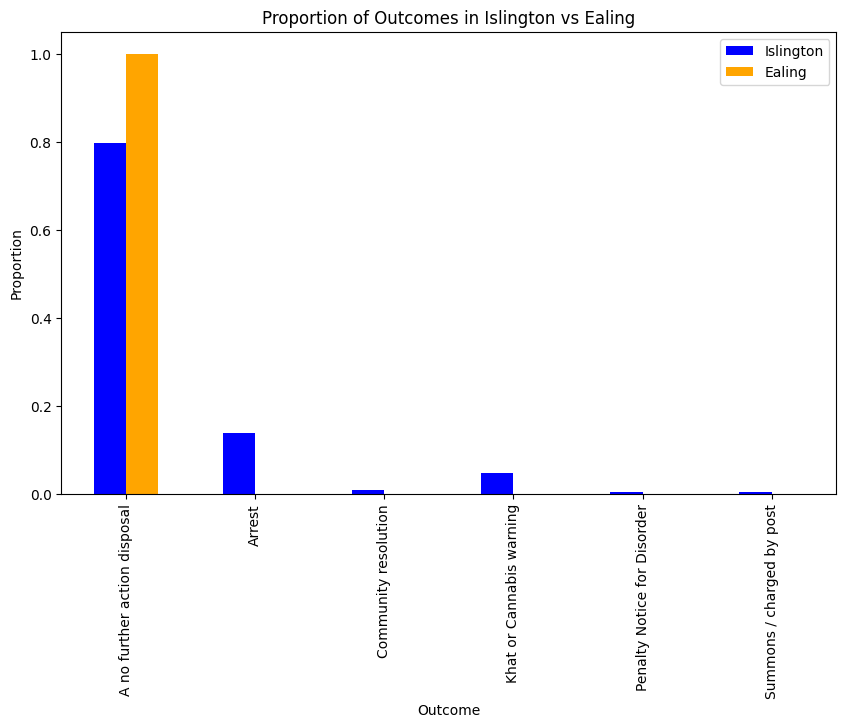

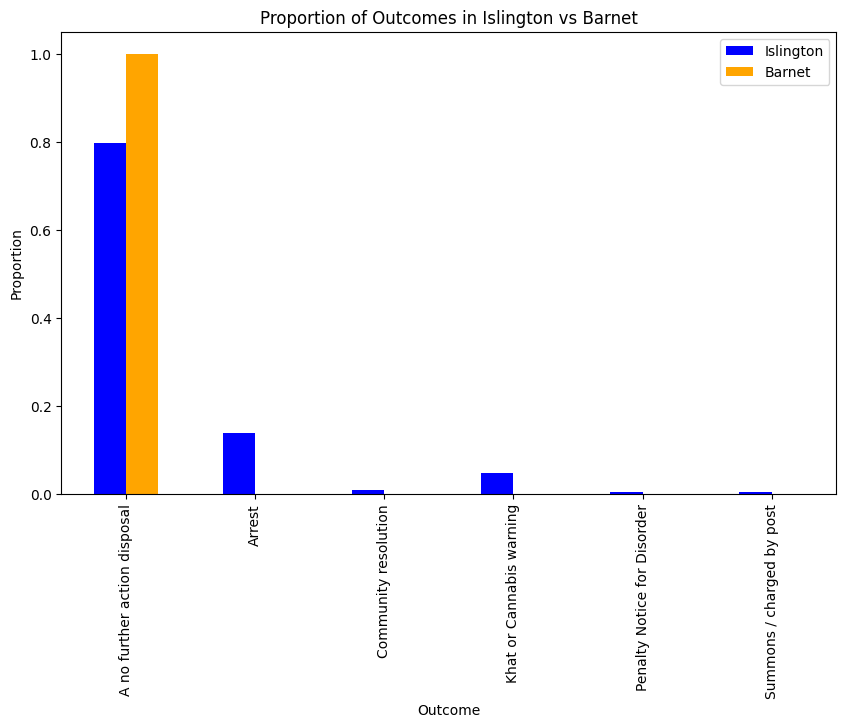

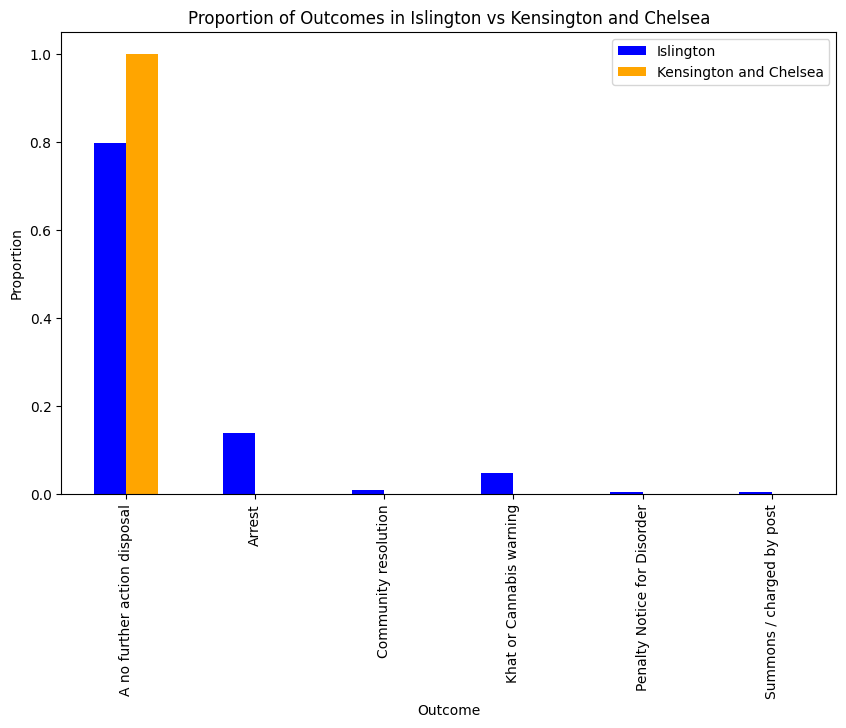

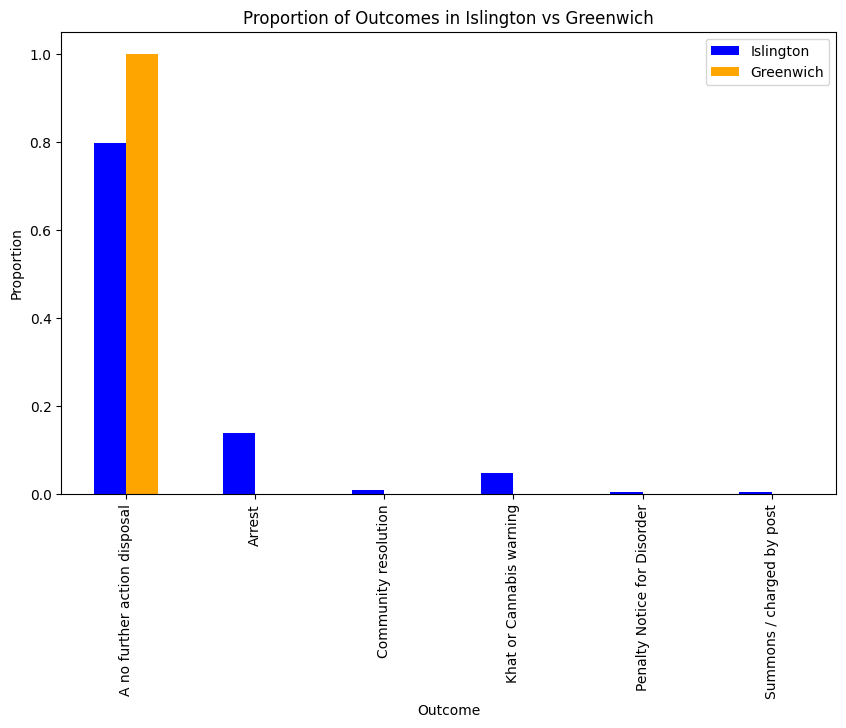

In [73]:
# Function to calculate proportions and plot
def plot_borough_comparison(low_trust_borough, compare_borough):
    # Filter the low trust borough
    low_trust_df = df2[df2['Borough'] == low_trust_borough]

    # Filter the compare borough
    compare_df = df2[df2['Borough'] == compare_borough]

    # Calculate proportions for the low trust borough
    low_trust_proportions = low_trust_df['Outcome'].value_counts(normalize=True)

    # Calculate proportions for the compare borough
    compare_proportions = compare_df['Outcome'].value_counts(normalize=True)

    # Create a combined DataFrame for plotting
    proportions_df = pd.DataFrame({
        low_trust_borough: low_trust_proportions,
        compare_borough: compare_proportions
    }).fillna(0)  # Fill NaN with 0 for missing values

    # Plotting
    ax = proportions_df.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

    # Adding labels and title
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Proportion of Outcomes in {low_trust_borough} vs {compare_borough}')

    # Show the plot
    plt.show()

# Get unique boroughs from the DataFrame
unique_boroughs = df2['Borough'].unique()

# Plot comparisons for each low trust borough against all other boroughs
for low_trust_borough in low_trust_boroughs:
    for compare_borough in unique_boroughs:
        if low_trust_borough != compare_borough:
            plot_borough_comparison(low_trust_borough, compare_borough)